In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score
import gc
import time
import os
from typing import List, Optional
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
sns.set(style='darkgrid')

In [ ]:
# Load data
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Checking which csv files to use
Go through each csv file to see which ones are the most useful. Since loading the entire dataset is very memory intensive, we will be working with only 4 csv files from the dataset.

`Don't run these cells they're only for initial analysis. Run the next part`

In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
d1.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0       443         6  02/03/2018 08:47:38         141385             9   
1     49684         6  02/03/2018 08:47:38            281             2   
2       443         6  02/03/2018 08:47:40         279824            11   
3       443         6  02/03/2018 08:47:40            132             2   
4       443         6  02/03/2018 08:47:41         274016             9   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             7              553           3773.0              202   
1             1               38              0.0               38   
2            15             1086          10527.0              385   
3             0                0              0.0                0   
4            13             1285           6141.0              517   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                20          0.0         0.0   
1                0  ...                20          0.0         0.0   
2                0  ...                20          0.0         0.0   
3                0  ...                20          0.0         0.0   
4                0  ...                20          0.0         0.0   

   Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  
0         0.0         0.0        0.0       0.0       0.0       0.0  Benign  
1         0.0         0.0        0.0       0.0       0.0       0.0  Benign  
2         0.0         0.0        0.0       0.0       0.0       0.0  Benign  
3         0.0         0.0        0.0       0.0       0.0       0.0  Benign  
4         0.0         0.0        0.0       0.0       0.0       0.0  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d1['Label'].unique())
print("\nLabel counts:\n",d1['Label'].value_counts())

Unique labels:
['Benign' 'Bot']

Label counts:
 Label
Benign    762384
Bot       286191
Name: count, dtype: int64


In [ ]:
del d1
gc.collect()

0

In [ ]:
d2 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/unused files/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')
d2.head()

Dst Port Protocol            Timestamp Flow Duration Tot Fwd Pkts  \
0        0        0  16/02/2018 08:27:23     112640768            3   
1        0        0  16/02/2018 08:30:12     112641773            3   
2    35605        6  16/02/2018 08:26:55      20784143           23   
3        0        0  16/02/2018 08:33:01     112640836            3   
4       23        6  16/02/2018 08:27:59            20            1   

  Tot Bwd Pkts TotLen Fwd Pkts TotLen Bwd Pkts Fwd Pkt Len Max  \
0            0               0               0               0   
1            0               0               0               0   
2           44            2416            1344             240   
3            0               0               0               0   
4            1               0               0               0   

  Fwd Pkt Len Min  ... Fwd Seg Size Min Active Mean Active Std Active Max  \
0               0  ...                0           0        0.0          0   
1               0  ...                0           0        0.0          0   
2              64  ...               20     2624734        0.0    2624734   
3               0  ...                0           0        0.0          0   
4               0  ...               20           0        0.0          0   

  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min   Label  
0          0  56300000.0  138.592929  56300000  56300000  Benign  
1          0  56300000.0  263.750829  56300000  56300000  Benign  
2    2624734   9058214.0         0.0   9058214   9058214  Benign  
3          0  56300000.0   82.024387  56300000  56300000  Benign  
4          0         0.0         0.0         0         0  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d2['Label'].unique())
print("\nLabel counts:\n", d2['Label'].value_counts())

Unique labels:
['Benign' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk' 'Label']

Label counts:
 Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Label                            1
Name: count, dtype: int64


In [ ]:
del d2
gc.collect()

0

In [ ]:
d3 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/unused files/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv')
d3.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0        22         6  23/02/2018 08:18:29        1532698            11   
1       500        17  23/02/2018 08:17:45      117573855             3   
2       500        17  23/02/2018 08:17:45      117573848             3   
3        22         6  23/02/2018 08:19:55        1745392            11   
4       500        17  23/02/2018 08:18:17       89483474             6   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0            11             1179             1969              648   
1             0             1500                0              500   
2             0             1500                0              500   
3            11             1179             1969              648   
4             0             3000                0              500   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                32          0.0         0.0   
1              500  ...                 8          0.0         0.0   
2              500  ...                 8          0.0         0.0   
3                0  ...                32          0.0         0.0   
4              500  ...                 8    4000364.0         0.0   

   Active Max  Active Min   Idle Mean      Idle Std  Idle Max  Idle Min  \
0           0           0         0.0  0.000000e+00         0         0   
1           0           0  58786927.5  2.375324e+07  75583006  41990849   
2           0           0  58786924.0  2.375325e+07  75583007  41990841   
3           0           0         0.0  0.000000e+00         0         0   
4     4000364     4000364  21370777.5  1.528092e+07  41989576   7200485   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d3['Label'].unique())
print("\nLabel counts:\n", d3['Label'].value_counts())

Unique labels:
['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection']

Label counts:
 Label
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64


In [ ]:
del d3
gc.collect()

0

In [ ]:
d4 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')
d4.head()

Dst Port Protocol            Timestamp Flow Duration Tot Fwd Pkts  \
0        0        0  01/03/2018 08:17:11     115307855            5   
1        0        0  01/03/2018 08:20:07      60997457            2   
2       67       17  01/03/2018 08:17:18      61149019            5   
3        0        0  01/03/2018 08:22:09      60997555            2   
4        0        0  01/03/2018 08:24:11      61997503            3   

  Tot Bwd Pkts TotLen Fwd Pkts TotLen Bwd Pkts Fwd Pkt Len Max  \
0            0               0               0               0   
1            0               0               0               0   
2            0            1500               0             300   
3            0               0               0               0   
4            0               0               0               0   

  Fwd Pkt Len Min  ... Fwd Seg Size Min Active Mean Active Std Active Max  \
0               0  ...                0     1812348          0    1812348   
1               0  ...                0           0          0          0   
2             300  ...                8     3530939          0    3530939   
3               0  ...                0           0          0          0   
4               0  ...                0      999909          0     999909   

  Active Min Idle Mean     Idle Std  Idle Max  Idle Min   Label  
0    1812348  56700000  6010057.622  61000000  52500000  Benign  
1          0  61000000            0  61000000  61000000  Benign  
2    3530939  19200000     12500000  32600000   7999725  Benign  
3          0  61000000            0  61000000  61000000  Benign  
4     999909  61000000            0  61000000  61000000  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d4['Label'].unique())
print("\nLabel counts:\n", d4['Label'].value_counts())

Unique labels:
['Benign' 'Label' 'Infilteration']

Label counts:
 Label
Benign           238037
Infilteration     93063
Label                25
Name: count, dtype: int64


In [ ]:
del d4
gc.collect()

0

In [ ]:
d5 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/unused files/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')
d5.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  15/02/2018 08:25:18      112641158             3   
1        22         6  15/02/2018 08:29:05       37366762            14   
2     47514         6  15/02/2018 08:29:42            543             2   
3         0         0  15/02/2018 08:28:07      112640703             3   
4         0         0  15/02/2018 08:30:56      112640874             3   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1            12             2168             2993              712   
2             0               64                0               64   
3             0                0                0                0   
4             0                0                0                0   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean     Active Std  \
0                0  ...                 0          0.0       0.000000   
1                0  ...                32    1024353.0  649038.754495   
2                0  ...                32          0.0       0.000000   
3                0  ...                 0          0.0       0.000000   
4                0  ...                 0          0.0       0.000000   

   Active Max  Active Min   Idle Mean      Idle Std  Idle Max  Idle Min  \
0           0           0  56320579.0  7.042784e+02  56321077  56320081   
1     1601183      321569  11431221.0  3.644991e+06  15617415   8960247   
2           0           0         0.0  0.000000e+00         0         0   
3           0           0  56320351.5  3.669884e+02  56320611  56320092   
4           0           0  56320437.0  7.198347e+02  56320946  56319928   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d5['Label'].unique())
print("\nLabel counts:\n", d5['Label'].value_counts())

Unique labels:
['Benign' 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris']

Label counts:
 Label
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64


In [ ]:
del d5
gc.collect()

0

In [ ]:
d6 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/unused files/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv')
d6.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0        22         6  22/02/2018 08:26:03       20553406            10   
1     34989         6  22/02/2018 08:26:24            790             2   
2       500        17  22/02/2018 08:25:10       99745913             5   
3       500        17  22/02/2018 08:25:10       99745913             5   
4       500        17  22/02/2018 08:24:59       89481361             6   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             7             1063             1297              744   
1             0              848                0              848   
2             0             2500                0              500   
3             0             2500                0              500   
4             0             3000                0              500   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                20    1027304.0         0.0   
1                0  ...                20          0.0         0.0   
2              500  ...                 8    4000203.0         0.0   
3              500  ...                 8    4000189.0         0.0   
4              500  ...                 8    4000554.0         0.0   

   Active Max  Active Min     Idle Mean      Idle Std  Idle Max  Idle Min  \
0     1027304     1027304  1.952608e+07  0.000000e+00  19526080  19526080   
1           0           0  0.000000e+00  0.000000e+00         0         0   
2     4000203     4000203  3.191524e+07  3.792787e+07  75584115   7200679   
3     4000189     4000189  3.191524e+07  3.792788e+07  75584130   7200693   
4     4000554     4000554  2.137020e+07  1.528109e+07  41990741   7200848   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d6['Label'].unique())
print("\nLabel counts:\n", d6['Label'].value_counts())

Unique labels:
['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection']

Label counts:
 Label
Benign              1048213
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34
Name: count, dtype: int64


In [ ]:
del d6
gc.collect()

0

In [ ]:
d7 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/unused files/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')
d7.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1             0                0                0                0   
2             0                0                0                0   
3            10             1239             2273              744   
4            11             1143             2209              744   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                 0          0.0         0.0   
1                0  ...                 0          0.0         0.0   
2                0  ...                 0          0.0         0.0   
3                0  ...                32          0.0         0.0   
4                0  ...                32          0.0         0.0   

   Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min   Label  
0           0           0  56320859.5  139.300036  56320958  56320761  Benign  
1           0           0  56320733.0  114.551299  56320814  56320652  Benign  
2           0           0  56319311.5  301.934596  56319525  56319098  Benign  
3           0           0         0.0    0.000000         0         0  Benign  
4           0           0         0.0    0.000000         0         0  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d7['Label'].unique())
print("\nLabel counts:\n", d7['Label'].value_counts())

Unique labels:
['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']

Label counts:
 Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64


In [ ]:
del d7
gc.collect()

0

In [ ]:
d8 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv')
d8.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0        80         6  21/02/2018 08:33:25          37953             5   
1       500        17  21/02/2018 08:33:06      117573474             3   
2       500        17  21/02/2018 08:33:06      117573474             3   
3       500        17  21/02/2018 08:33:11       99743998             5   
4       500        17  21/02/2018 08:33:11       99743999             5   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             3              135              127              135   
1             0             1500                0              500   
2             0             1500                0              500   
3             0             2500                0              500   
4             0             2500                0              500   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                32          0.0         0.0   
1              500  ...                 8          0.0         0.0   
2              500  ...                 8          0.0         0.0   
3              500  ...                 8    4000290.0         0.0   
4              500  ...                 8    4000286.0         0.0   

   Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min   Label  
0           0           0         0.0         0.0         0         0  Benign  
1           0           0  58800000.0  23800000.0  75600000  42000000  Benign  
2           0           0  58800000.0  23800000.0  75600000  42000000  Benign  
3     4000290     4000290  31900000.0  37900000.0  75600000   7200397  Benign  
4     4000286     4000286  31900000.0  37900000.0  75600000   7200399  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d8['Label'].unique())
print("\nLabel counts:\n", d8['Label'].value_counts())

Unique labels:
['Benign' 'DDOS attack-LOIC-UDP' 'DDOS attack-HOIC']

Label counts:
 Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64


In [ ]:
del d8
gc.collect()

0

In [ ]:
d9 = pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/unused files/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv')
d9.head()

Dst Port Protocol            Timestamp Flow Duration Tot Fwd Pkts  \
0      443        6  28/02/2018 08:22:13         94658            6   
1      443        6  28/02/2018 08:22:13           206            2   
2      445        6  28/02/2018 08:22:15        165505            3   
3      443        6  28/02/2018 08:22:16        102429            6   
4      443        6  28/02/2018 08:22:16           167            2   

  Tot Bwd Pkts TotLen Fwd Pkts TotLen Bwd Pkts Fwd Pkt Len Max  \
0            7             708            3718             387   
1            0               0               0               0   
2            1               0               0               0   
3            7             708            3718             387   
4            0               0               0               0   

  Fwd Pkt Len Min  ... Fwd Seg Size Min Active Mean Active Std Active Max  \
0               0  ...               20         0.0        0.0          0   
1               0  ...               20         0.0        0.0          0   
2               0  ...               20         0.0        0.0          0   
3               0  ...               20         0.0        0.0          0   
4               0  ...               20         0.0        0.0          0   

  Active Min Idle Mean Idle Std Idle Max Idle Min   Label  
0          0       0.0      0.0        0        0  Benign  
1          0       0.0      0.0        0        0  Benign  
2          0       0.0      0.0        0        0  Benign  
3          0       0.0      0.0        0        0  Benign  
4          0       0.0      0.0        0        0  Benign  

[5 rows x 80 columns]

In [ ]:
print("Unique labels:")
print(d9['Label'].unique())
print("\nLabel counts:\n", d9['Label'].value_counts())

Unique labels:
['Benign' 'Label' 'Infilteration']

Label counts:
 Label
Benign           544200
Infilteration     68871
Label                33
Name: count, dtype: int64


In [ ]:
del d9
gc.collect()

0

In [ ]:
import pandas as pd

file = '/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/unused files/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv'
chunk_iter = pd.read_csv(file, chunksize=100_000, low_memory=True, dtype=str)

label_counts = {}

for chunk in chunk_iter:
    labels = chunk['Label'].value_counts()
    for label, count in labels.items():
        label_counts[label] = label_counts.get(label, 0) + count

# Display result
label_counts = pd.Series(label_counts).sort_values(ascending=False)
print(label_counts)


Benign                    7372557
DDoS attacks-LOIC-HTTP     576191
dtype: int64


# Dataset Analysis
The CSE-CIC-IDS2018 dataset from Kaggle contains 10 files each captured in a specific day with different types of attacks:

- 03-02-2018: ['Benign', 'Bot']
- 02-28-2018 - 03-01-2018: ['Benign', 'Label', 'Infilteration']
- 02-22-2018 - 02-23-2018: ['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection']
- 02-21-2018 : ['Benign', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC']
- 02-20-2018: ['Benign', 'DDoS attacks-LOIC-HTTP']
- 02-16-2018: ['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk', 'Label']
- 02-15-2018: ['Benign', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris']
- 02-14-2018: ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce']

Here, we relied on data from dates: 03-02-2018, 02-23-2018, 03-01-2018, 02-21-2018.
It covers the following attacks: Bot, BruteForce-Web, BruteForce-XSS, SQL-Injection, Infiltration, DoS-GoldenEye, DoS-Slowloris, DDoS attack-HOIC, DDoS attacks-LOIC-UDP.

In [ ]:
dataset_list = [
    pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'),
    pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv'),
    pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv'),
    pd.read_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv')
]

In [ ]:
data = pd.concat(dataset_list, ignore_index=True, axis=0)
del dataset_list # To save memory

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476850 entries, 0 to 3476849
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

In [ ]:
def fixDataType(df_dataset):

    df_dataset = df_dataset[df_dataset['Dst Port'] != 'Dst Port']

    df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int)
    df_dataset['Protocol'] = df_dataset['Protocol'].astype(int)
    df_dataset['Flow Duration'] = df_dataset['Flow Duration'].astype(int)
    df_dataset['Tot Fwd Pkts'] = df_dataset['Tot Fwd Pkts'].astype(int)
    df_dataset['Tot Bwd Pkts'] = df_dataset['Tot Bwd Pkts'].astype(int)
    df_dataset['TotLen Fwd Pkts'] = df_dataset['TotLen Fwd Pkts'].astype(int)
    df_dataset['TotLen Bwd Pkts'] = df_dataset['TotLen Bwd Pkts'].astype(int)
    df_dataset['Fwd Pkt Len Max'] = df_dataset['Fwd Pkt Len Max'].astype(int)
    df_dataset['Fwd Pkt Len Min'] = df_dataset['Fwd Pkt Len Min'].astype(int)
    df_dataset['Fwd Pkt Len Mean'] = df_dataset['Fwd Pkt Len Mean'].astype(float)
    df_dataset['Fwd Pkt Len Std'] = df_dataset['Fwd Pkt Len Std'].astype(float)
    df_dataset['Bwd Pkt Len Max'] = df_dataset['Bwd Pkt Len Max'].astype(int)
    df_dataset['Bwd Pkt Len Min'] = df_dataset['Bwd Pkt Len Min'].astype(int)
    df_dataset['Bwd Pkt Len Mean'] = df_dataset['Bwd Pkt Len Mean'].astype(float)
    df_dataset['Bwd Pkt Len Std'] = df_dataset['Bwd Pkt Len Std'].astype(float)
    df_dataset['Flow Byts/s'] = df_dataset['Flow Byts/s'].astype(float)
    df_dataset['Flow Pkts/s'] = df_dataset['Flow Pkts/s'].astype(float)
    df_dataset['Flow IAT Mean'] = df_dataset['Flow IAT Mean'].astype(float)
    df_dataset['Flow IAT Std'] = df_dataset['Flow IAT Std'].astype(float)
    df_dataset['Flow IAT Max'] = df_dataset['Flow IAT Max'].astype(int)
    df_dataset['Flow IAT Min'] = df_dataset['Flow IAT Min'].astype(int)
    df_dataset['Fwd IAT Tot'] = df_dataset['Fwd IAT Tot'].astype(int)
    df_dataset['Fwd IAT Mean'] = df_dataset['Fwd IAT Mean'].astype(float)
    df_dataset['Fwd IAT Std'] = df_dataset['Fwd IAT Std'].astype(float)
    df_dataset['Fwd IAT Max'] = df_dataset['Fwd IAT Max'].astype(int)
    df_dataset['Fwd IAT Min'] = df_dataset['Fwd IAT Min'].astype(int)
    df_dataset['Bwd IAT Tot'] = df_dataset['Bwd IAT Tot'].astype(int)
    df_dataset['Bwd IAT Mean'] = df_dataset['Bwd IAT Mean'].astype(float)
    df_dataset['Bwd IAT Std'] = df_dataset['Bwd IAT Std'].astype(float)
    df_dataset['Bwd IAT Max'] = df_dataset['Bwd IAT Max'].astype(int)
    df_dataset['Bwd IAT Min'] = df_dataset['Bwd IAT Min'].astype(int)
    df_dataset['Fwd PSH Flags'] = df_dataset['Fwd PSH Flags'].astype(int)
    df_dataset['Bwd PSH Flags'] = df_dataset['Bwd PSH Flags'].astype(int)
    df_dataset['Fwd URG Flags'] = df_dataset['Fwd URG Flags'].astype(int)
    df_dataset['Bwd URG Flags'] = df_dataset['Bwd URG Flags'].astype(int)
    df_dataset['Fwd Header Len'] = df_dataset['Fwd Header Len'].astype(int)
    df_dataset['Bwd Header Len'] = df_dataset['Bwd Header Len'].astype(int)
    df_dataset['Fwd Pkts/s'] = df_dataset['Fwd Pkts/s'].astype(float)
    df_dataset['Bwd Pkts/s'] = df_dataset['Bwd Pkts/s'].astype(float)
    df_dataset['Pkt Len Min'] = df_dataset['Pkt Len Min'].astype(int)
    df_dataset['Pkt Len Max'] = df_dataset['Pkt Len Max'].astype(int)
    df_dataset['Pkt Len Mean'] = df_dataset['Pkt Len Mean'].astype(float)
    df_dataset['Pkt Len Std'] = df_dataset['Pkt Len Std'].astype(float)
    df_dataset['Pkt Len Var'] = df_dataset['Pkt Len Var'].astype(float)
    df_dataset['FIN Flag Cnt'] = df_dataset['FIN Flag Cnt'].astype(int)
    df_dataset['SYN Flag Cnt'] = df_dataset['SYN Flag Cnt'].astype(int)
    df_dataset['RST Flag Cnt'] = df_dataset['RST Flag Cnt'].astype(int)
    df_dataset['PSH Flag Cnt'] = df_dataset['PSH Flag Cnt'].astype(int)
    df_dataset['ACK Flag Cnt'] = df_dataset['ACK Flag Cnt'].astype(int)
    df_dataset['URG Flag Cnt'] = df_dataset['URG Flag Cnt'].astype(int)
    df_dataset['CWE Flag Count'] = df_dataset['CWE Flag Count'].astype(int)
    df_dataset['ECE Flag Cnt'] = df_dataset['ECE Flag Cnt'].astype(int)
    df_dataset['Down/Up Ratio'] = df_dataset['Down/Up Ratio'].astype(int)
    df_dataset['Pkt Size Avg'] = df_dataset['Pkt Size Avg'].astype(float)
    df_dataset['Fwd Seg Size Avg'] = df_dataset['Fwd Seg Size Avg'].astype(float)
    df_dataset['Bwd Seg Size Avg'] = df_dataset['Bwd Seg Size Avg'].astype(float)
    df_dataset['Fwd Byts/b Avg'] = df_dataset['Fwd Byts/b Avg'].astype(int)
    df_dataset['Fwd Pkts/b Avg'] = df_dataset['Fwd Pkts/b Avg'].astype(int)
    df_dataset['Fwd Blk Rate Avg'] = df_dataset['Fwd Blk Rate Avg'].astype(int)
    df_dataset['Bwd Byts/b Avg'] = df_dataset['Bwd Byts/b Avg'].astype(int)
    df_dataset['Bwd Pkts/b Avg'] = df_dataset['Bwd Pkts/b Avg'].astype(int)
    df_dataset['Bwd Blk Rate Avg'] = df_dataset['Bwd Blk Rate Avg'].astype(int)
    df_dataset['Subflow Fwd Pkts'] = df_dataset['Subflow Fwd Pkts'].astype(int)
    df_dataset['Subflow Fwd Byts'] = df_dataset['Subflow Fwd Byts'].astype(int)
    df_dataset['Subflow Bwd Pkts'] = df_dataset['Subflow Bwd Pkts'].astype(int)
    df_dataset['Subflow Bwd Byts'] = df_dataset['Subflow Bwd Byts'].astype(int)
    df_dataset['Init Fwd Win Byts'] = df_dataset['Init Fwd Win Byts'].astype(int)
    df_dataset['Init Bwd Win Byts'] = df_dataset['Init Bwd Win Byts'].astype(int)
    df_dataset['Fwd Act Data Pkts'] = df_dataset['Fwd Act Data Pkts'].astype(int)
    df_dataset['Fwd Seg Size Min'] = df_dataset['Fwd Seg Size Min'].astype(int)
    df_dataset['Active Mean'] = df_dataset['Active Mean'].astype(float)
    df_dataset['Active Std'] = df_dataset['Active Std'].astype(float)
    df_dataset['Active Max'] = df_dataset['Active Max'].astype(int)
    df_dataset['Active Min'] = df_dataset['Active Min'].astype(int)
    df_dataset['Idle Mean'] = df_dataset['Idle Mean'].astype(float)
    df_dataset['Idle Std'] = df_dataset['Idle Std'].astype(float)
    df_dataset['Idle Max'] = df_dataset['Idle Max'].astype(int)
    df_dataset['Idle Min'] = df_dataset['Idle Min'].astype(int)

    return df_dataset

data = fixDataType(data)

In [ ]:
gc.collect()

6

In [ ]:
print(data.dtypes.value_counts())

int64      54
float64    24
object      2
Name: count, dtype: int64


In [ ]:
print(f"Dataset shape: {data.shape}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Number of features: {data.shape[1]}")
print(f"Number of samples: {data.shape[0]}")

Dataset shape: (3476825, 80)
Memory usage: 2562.82 MB
Number of features: 80
Number of samples: 3476825


In [ ]:
# Removal of leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [ ]:
def optimize_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

data = optimize_dtypes(data)

In [ ]:
print(data.dtypes.value_counts())
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

int32      54
float32    24
object      2
Name: count, dtype: int64
Memory usage: 1528.31 MB


In [ ]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 25707


In [ ]:
dup_rows = data[data.duplicated(keep=False)]
dup_label_counts = dup_rows['Label'].value_counts()
print(dup_label_counts)

Label
DDOS attack-HOIC    34266
Benign               8105
Bot                  7607
Infilteration          45
Brute Force -Web        4
Name: count, dtype: int64


In [ ]:
class_counts_before = data['Label'].value_counts()
data_no_dup = data.drop_duplicates()
class_counts_after = data_no_dup['Label'].value_counts()
pd.concat([class_counts_before, class_counts_after], axis=1, keys=['Before', 'After'])

Before    After
Label                                 
Benign                2409263  2405013
DDOS attack-HOIC       686012   668461
Bot                    286191   282310
Infilteration           93063    93040
DDOS attack-LOIC-UDP     1730     1730
Brute Force -Web          362      360
Brute Force -XSS          151      151
SQL Injection              53       53

In [ ]:
data = data.drop_duplicates(keep='first')
gc.collect()

0

In [ ]:
print(f"New shape: {data.shape}")
print(data['Label'].value_counts())

New shape: (3451118, 80)
Label
Benign                  2405013
DDOS attack-HOIC         668461
Bot                      282310
Infilteration             93040
DDOS attack-LOIC-UDP       1730
Brute Force -Web            360
Brute Force -XSS            151
SQL Injection                53
Name: count, dtype: int64


Identifying Missing Values

In [ ]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Byts/s    8146
dtype: int64


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Byts/s     4517
Flow Pkts/s    12663
dtype: int64


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 8146
Missing values after processing infinite values: 25326


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Byts/s    12663
Flow Pkts/s    12663
dtype: int64


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

             Missing Values  Percentage of Total Values
Flow Byts/s           12663                        0.37
Flow Pkts/s           12663                        0.37


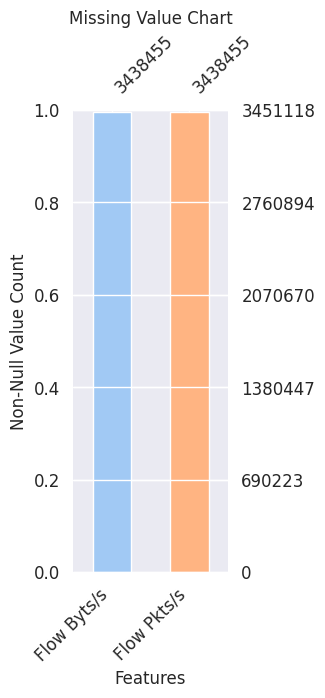

In [ ]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

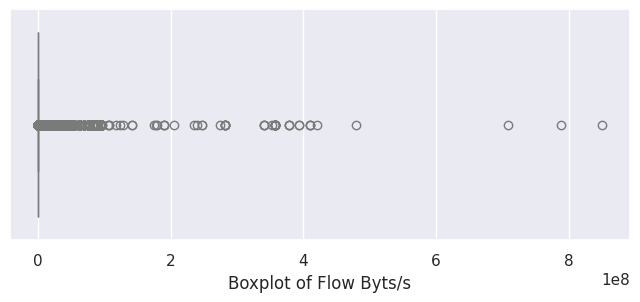

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Byts/s'])
plt.xlabel('Boxplot of Flow Byts/s')
plt.show()

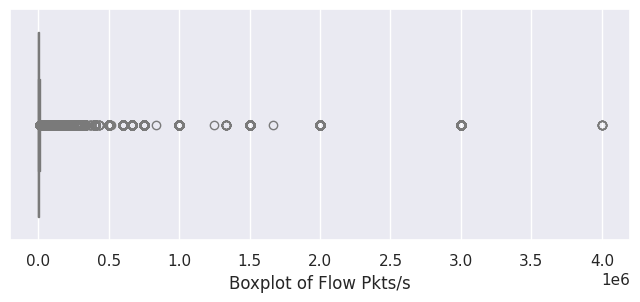

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Pkts/s'])
plt.xlabel('Boxplot of Flow Pkts/s')
plt.show()

In [ ]:
med_flow_bytes = data['Flow Byts/s'].median()
med_flow_packets = data['Flow Pkts/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  832.4825439453125
Median of Flow Packets/s:  512.8580932617188


In [ ]:
# Filling missing values with median
data['Flow Byts/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Pkts/s'].fillna(med_flow_packets, inplace = True)

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Byts/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Pkts/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [ ]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

Label
Benign                  2405013
DDOS attack-HOIC         668461
Bot                      282310
Infilteration             93040
DDOS attack-LOIC-UDP       1730
Brute Force -Web            360
Brute Force -XSS            151
SQL Injection                53
Name: count, dtype: int64

In [ ]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'Benign': 'BENIGN',
    'Bot': 'Bot',
    'DDOS attack-HOIC': 'DDoS',
    'DDOS attack-LOIC-UDP': 'DDoS',
    'Brute Force -Web': 'Web Attack',
    'Brute Force -XSS': 'Web Attack',
    'SQL Injection': 'Web Attack',
    'Infilteration': 'Infiltration'
}

In [ ]:
# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [ ]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2405013
DDoS             670191
Bot              282310
Infiltration      93040
Web Attack          564
Name: count, dtype: int64

In [ ]:
data.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 1 4 3 2]


In [ ]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: DDoS
3: Infiltration
4: Web Attack


In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg']

Correlation Matrix

In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

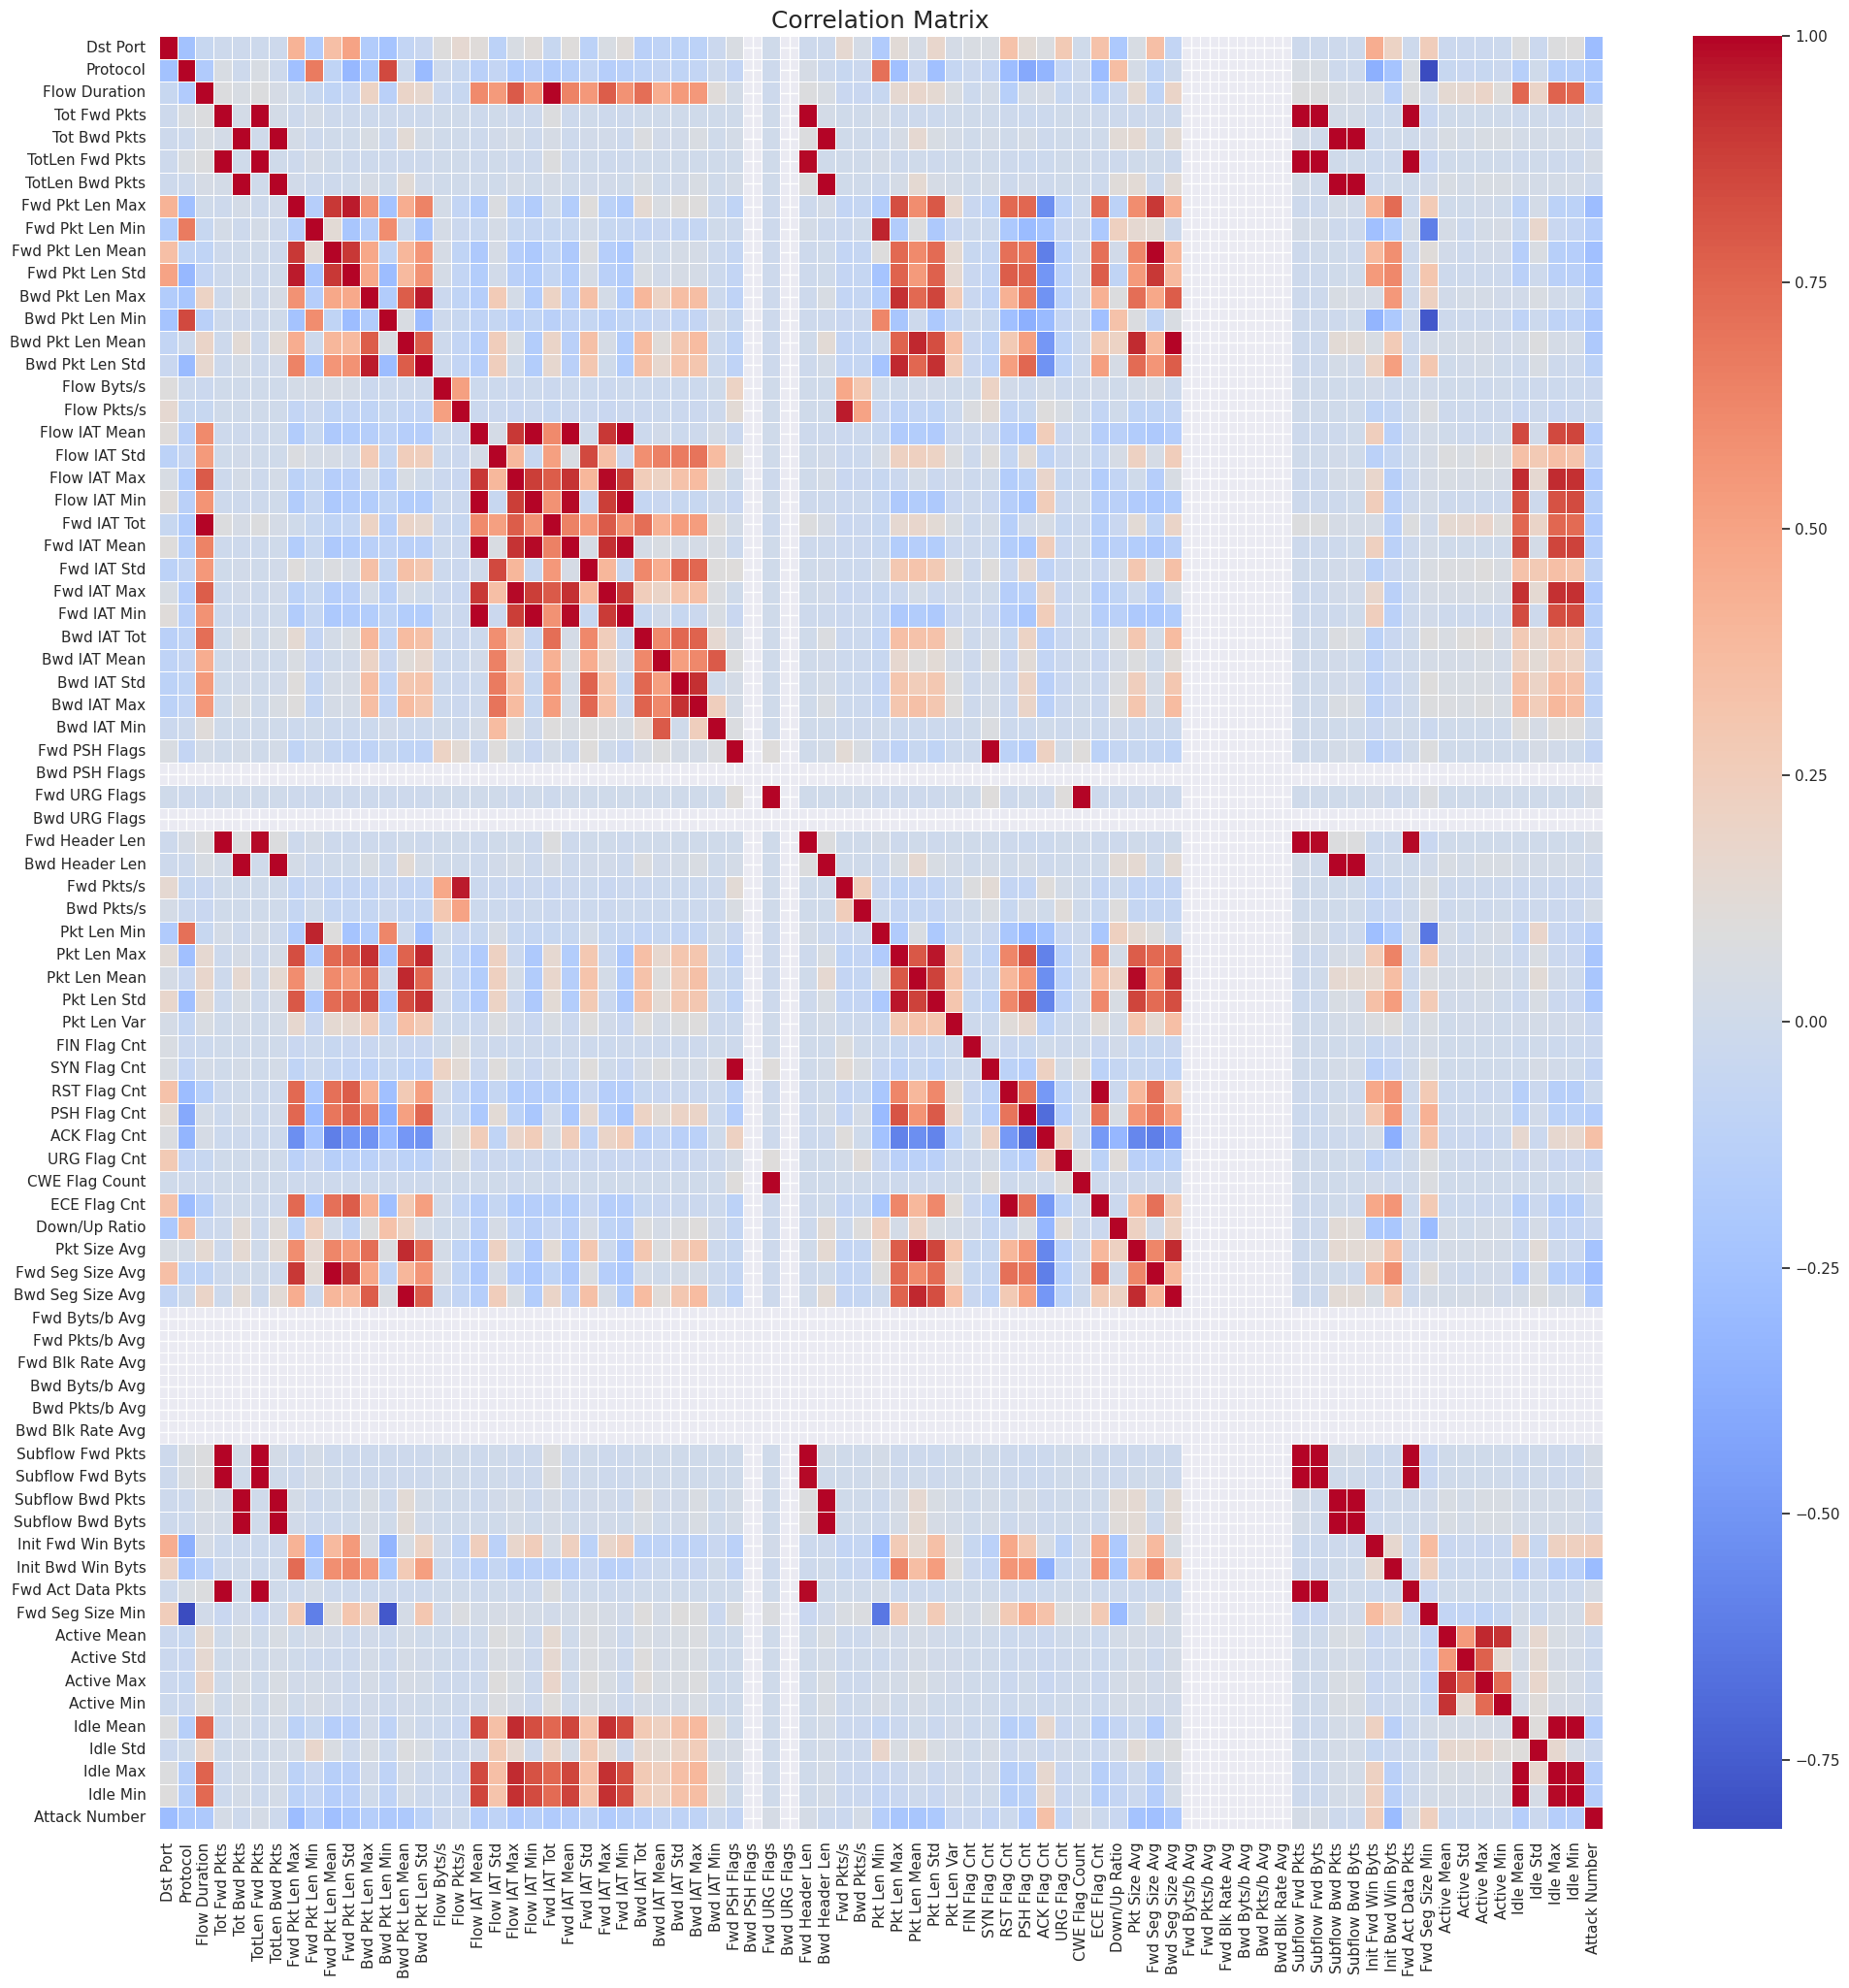

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Tot Fwd Pkts             :0.03
2.  TotLen Fwd Pkts          :0.03
3.  Fwd URG Flags            :0.04
4.  Fwd Header Len           :0.03
5.  Bwd Pkts/s               :0.02
6.  ACK Flag Cnt             :0.34
7.  CWE Flag Count           :0.04
8.  Subflow Fwd Pkts         :0.03
9.  Subflow Fwd Byts         :0.03
10. Init Fwd Win Byts        :0.25
11. Fwd Act Data Pkts        :0.04
12. Fwd Seg Size Min         :0.23


In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 12


In [ ]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(690223, 81)

In [ ]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Dst Port                        12181.413970          12161.329553          0.16%
Protocol                        7.879328              7.878674              0.01%
Flow Duration                   10658371.642068       10675316.672961       0.16%
Tot Fwd Pkts                    64.223413             69.769343             8.64%
Tot Bwd Pkts                    6.077599              6.424499              5.71%
TotLen Fwd Pkts                 2284.322937           2460.089591           7.69%
TotLen Bwd Pkts                 4958.090689           5443.020963           9.78%
Fwd Pkt Len Max                 246.675262            246.421842            0.10%
Fwd Pkt Len Min                 7.903246              7.927665              0.31%
Fwd Pkt Len Mean         

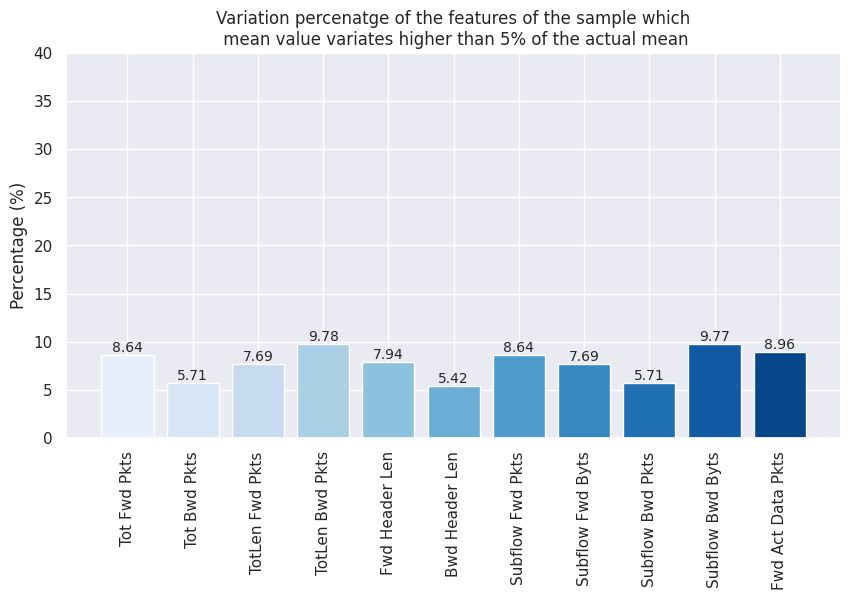

In [ ]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [ ]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Dst Port                      : 35358
2.  Protocol                      : 3
3.  Timestamp                     : 86230
4.  Flow Duration                 : 258461
5.  Tot Fwd Pkts                  : 917
6.  Tot Bwd Pkts                  : 765
7.  TotLen Fwd Pkts               : 5462
8.  TotLen Bwd Pkts               : 13172
9.  Fwd Pkt Len Max               : 1414
10. Fwd Pkt Len Min               : 155
11. Fwd Pkt Len Mean              : 14582
12. Fwd Pkt Len Std               : 22424
13. Bwd Pkt Len Max               : 1026
14. Bwd Pkt Len Min               : 306
15. Bwd Pkt Len Mean              : 20134
16. Bwd Pkt Len Std               : 23127
17. Flow Byts/s                   : 322131
18. Flow Pkts/s                   : 275877
19. Flow IAT Mean                 : 261489
20. Flow IAT Std                  : 330714
21. Flow IAT Max                  : 168767
22. Flow IAT Min                  : 66901
23. Fwd IAT Tot                   : 206369
24. Fwd IAT Mean 

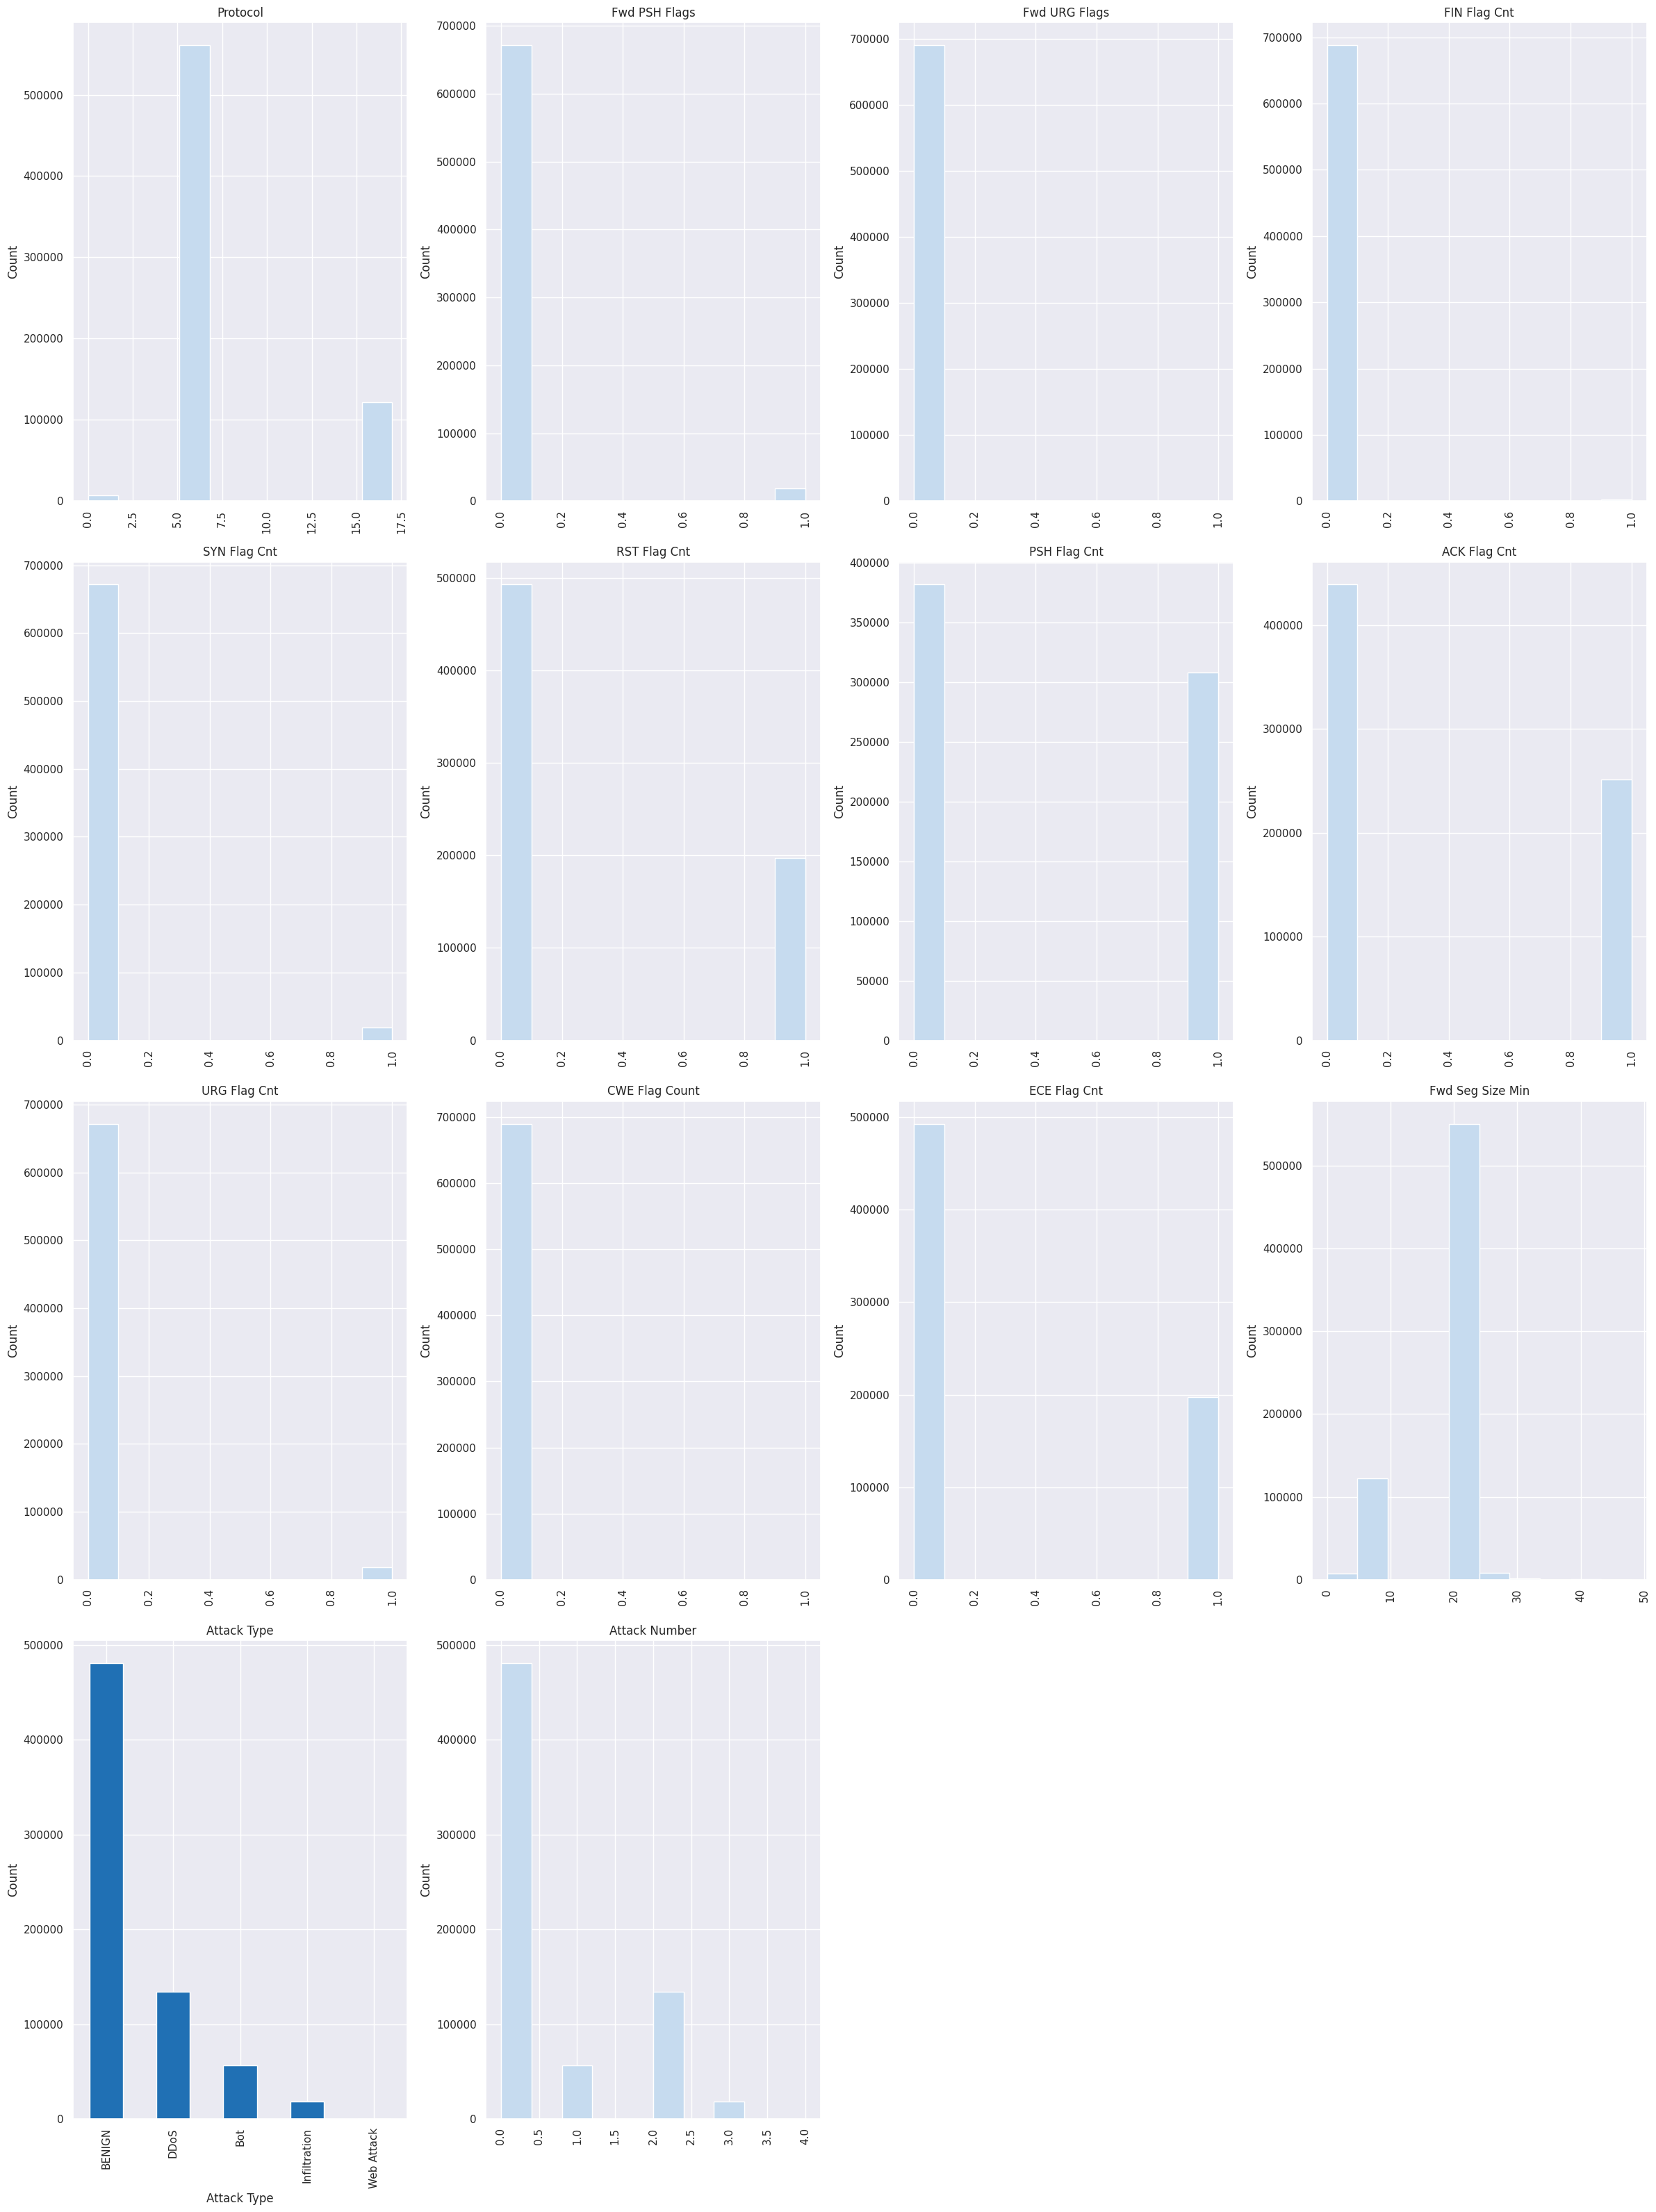

In [ ]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()


In [ ]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
data.drop('Attack Number', axis = 1, inplace = True)

Outliers

In [ ]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

               Outlier Count  Outlier Percentage
Dst Port              140992               20.43
Protocol              129198               18.72
Flow Duration         129189               18.72
Tot Fwd Pkts           72297               10.47
Tot Bwd Pkts           36579                5.30
...                      ...                 ...
Active Min             45124                6.54
Idle Mean              73755               10.69
Idle Std               40021                5.80
Idle Max               73755               10.69
Idle Min               73755               10.69

[78 rows x 2 columns]


In [ ]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Dst Port
- DDoS: 0 (0.00%)
- BENIGN: 0 (0.00%)
- Bot: 897 (1.59%)
- Infiltration: 3314 (17.77%)
- Web Attack: 27 (24.55%)

Feature: Protocol
- DDoS: 369 (0.27%)
- BENIGN: 123203 (25.63%)
- Bot: 54 (0.10%)
- Infiltration: 0 (0.00%)
- Web Attack: 27 (24.55%)

Feature: Flow Duration
- DDoS: 1805 (1.34%)
- BENIGN: 80009 (16.64%)
- Bot: 458 (0.81%)
- Infiltration: 3417 (18.32%)
- Web Attack: 0 (0.00%)

Feature: Tot Fwd Pkts
- DDoS: 33108 (24.66%)
- BENIGN: 26497 (5.51%)
- Bot: 883 (1.56%)
- Infiltration: 3716 (19.92%)
- Web Attack: 27 (24.55%)

Feature: Tot Bwd Pkts
- DDoS: 32739 (24.39%)
- BENIGN: 32215 (6.70%)
- Bot: 148 (0.26%)
- Infiltration: 4290 (23.00%)
- Web Attack: 26 (23.64%)

Feature: TotLen Fwd Pkts
- DDoS: 33108 (24.66%)
- BENIGN: 5405 (1.12%)
- Bot: 10 (0.02%)
- Infiltration: 4024 (21.57%)
- Web Attack: 26 (23.64%)

Feature: TotLen Bwd Pkts
- DDoS: 32739 (24.39%)
- BENIGN: 108621 (22.59%)
- Bot: 808 (1.43%)
- Infiltration: 3595 (19.27%)
- Web Attack: 27 (24.55%)

Feat

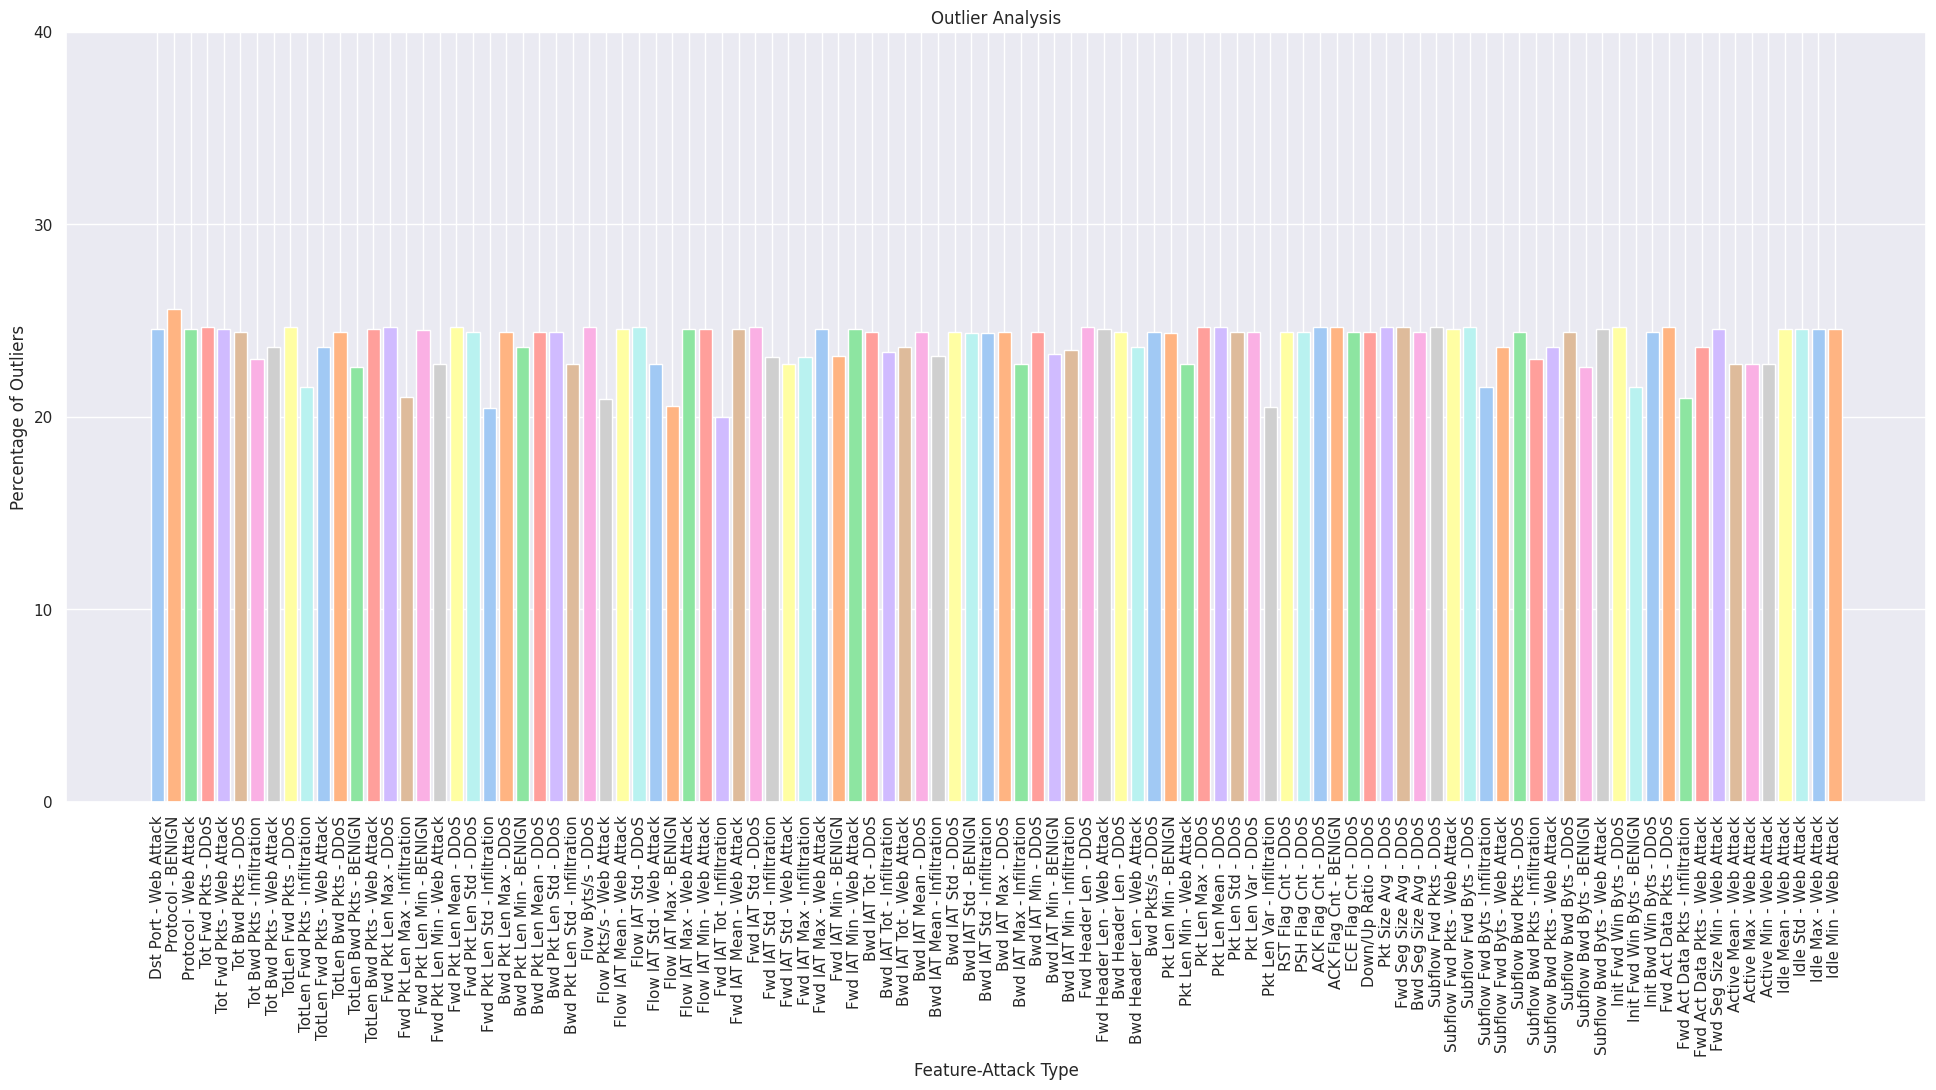

In [ ]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

# Preprocessing

In [ ]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1105.86 MB
Final memory usage: 1105.86 MB


In [ ]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')

In [ ]:
data.shape

(3451118, 72)

In [ ]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',


In [ ]:
data = data.drop('Timestamp', axis=1)

In [ ]:
data = data.drop('Protocol', axis=1)

# PCA

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
gc.collect()

4559

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.72%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0        5.421854  0.218186  0.069593 -0.355460 -0.129881  0.555974 -0.815879   
1       -2.766792 -1.335194 -0.098761 -0.261918  0.054500 -3.401984  0.166044   
2        7.275068  0.602748  0.252598 -0.893963 -0.090351  1.494705 -1.087604   
3       -2.837624 -1.393515 -0.025791 -0.282425 -0.042501 -1.159733 -0.094413   
4        6.503198  0.200686  0.039432 -0.115963  0.054192  1.116732 -0.659209   
...           ...       ...       ...       ...       ...       ...       ...   
3451113  4.682442 -0.675080 -0.778468  2.796707  1.146505  0.055327  0.652262   
3451114  4.919583 -0.592479 -0.762650  2.739867  1.124674  0.137117  0.598196   
3451115  4.920239 -0.588731 -0.761970  2.736935  1.121929  0.135634  0.597419   
3451116  4.917364 -0.599883 -0.764089  2.743605  1.129336  0.112941  0.601855   
3451117  4.776491 -0.637364 -0.776168  2.788972  1.143346  0.102334  0.634667   

              PC8       PC9      PC10  ...      PC26      PC27      PC28  \
0       -0.366578 -3.185745  1.022597  ... -1.078735 -0.512685 -0.195824   
1        2.726545  1.997794  2.834758  ... -0.516169 -0.244132  0.554834   
2        0.197231 -3.903038  1.453389  ... -1.189620  0.530872 -0.278220   
3       -0.919590 -0.472543 -0.055809  ... -0.196949  0.506877 -0.166344   
4        0.132335 -2.412875  0.902027  ... -0.581804  0.108989 -0.738020   
...           ...       ...       ...  ...       ...       ...       ...   
3451113  0.638374  1.703684 -0.435644  ...  0.056467 -0.004679  0.028684   
3451114  0.501906  1.561832 -0.333400  ...  0.073285 -0.035305  0.057878   
3451115  0.495828  1.568445 -0.334270  ...  0.074288 -0.035108  0.056566   
3451116  0.612182  1.531503 -0.354742  ...  0.055046 -0.031388  0.069406   
3451117  0.498869  1.694240 -0.381002  ...  0.064519 -0.017268  0.060646   

             PC29      PC30      PC31      PC32      PC33      PC34  \
0        0.435585  1.077954 -0.772332  0.111614 -0.140878  0.034385   
1        0.581596  0.807601  0.030362 -0.037438  0.168831 -0.122660   
2       -0.098945  0.684176 -0.588882  0.392642 -0.545310  0.017151   
3       -0.181904  0.068402 -0.413216  0.001521 -0.053925  0.149027   
4       -0.159222  0.900208 -1.094973  0.116037 -0.231926 -0.033815   
...           ...       ...       ...       ...       ...       ...   
3451113  0.011990 -0.058094  0.202557  0.045965  0.028013  0.110142   
3451114  0.068846  0.060772  0.189893  0.051614  0.016663  0.079499   
3451115  0.068905  0.061204  0.191038  0.049907  0.016333  0.079561   
3451116  0.076931  0.058861  0.185299  0.051298  0.016725  0.081394   
3451117  0.057511  0.022322  0.198707  0.043583  0.025705  0.082800   

         Attack Type  
0             BENIGN  
1             BENIGN  
2             BENIGN  
3             BENIGN  
4             BENIGN  
...              ...  
3451113       BENIGN  
3451114       BENIGN  
3451115       BENIGN  
3451116       BENIGN  
3451117       BENIGN  

[3451118 rows x 35 columns]

In [ ]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2405013
DDoS             670191
Bot              282310
Infiltration      93040
Web Attack          564
Name: count, dtype: int64

In [ ]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 500]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN          5000
DDoS            5000
Bot             5000
Infiltration    5000
Web Attack       564
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

#smote = SMOTE(sampling_strategy='auto', random_state=0)
#X_upsampled, y_upsampled = smote.fit_resample(X, y)

smote = SMOTE(sampling_strategy={'Infiltration': 10000, 'Web Attack':5000}, random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Infiltration    10000
Web Attack       5000
DDoS             5000
Bot              5000
BENIGN           5000
Name: count, dtype: int64

In [ ]:
gc.collect()

0

In [ ]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)


In [ ]:
# Save features and labels after the train-test split
X_train.to_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/test_train_split/X_train2018.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/test_train_split/X_test2018.csv', index=False)

y_train.to_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/test_train_split/y_train2018.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/test_train_split/y_test2018.csv', index=False)


# Random Forest

In [ ]:
# For cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, max_features=None, n_estimators=10,
                       random_state=0)

In [ ]:
cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.8871111111111111, 0.8875555555555555, 0.8813333333333333, 0.8866666666666667, 0.8915555555555555

Mean cross-validation score: 0.89


In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=20, n_estimators=15,
                       random_state=0)

In [ ]:
cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9075555555555556, 0.9051111111111111, 0.9088888888888889, 0.9095555555555556, 0.9108888888888889

Mean cross-validation score: 0.91


# Decision Tree

In [ ]:
gc.collect()

115

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

Decision Tree Model 1

Cross-validation scores: 0.8766666666666667, 0.884, 0.876, 0.884, 0.8884444444444445

Mean cross-validation score: 0.88


In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 8)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
cv_dt2 = cross_val_score(dt2, X_train, y_train, cv = 5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

Decision Tree Model 2

Cross-validation scores: 0.8897777777777778, 0.8971111111111111, 0.8942222222222223, 0.9017777777777778, 0.8988888888888888

Mean cross-validation score: 0.90


# KNN

In [ ]:
gc.collect()

52

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.8995555555555556, 0.9022222222222223, 0.8995555555555556, 0.9015555555555556, 0.9082222222222223

Mean cross-validation score: 0.90


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
cv_knn2 = cross_val_score(knn2, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9026666666666666, 0.9026666666666666, 0.9008888888888889, 0.9028888888888889, 0.9106666666666666

Mean cross-validation score: 0.90


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

In [ ]:
cv_nb_model = cross_val_score(nb_model, X_train, y_train, cv = 5)
print('Naive Bayes Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_nb_model)))
print(f'\nMean cross-validation score: {cv_nb_model.mean():.2f}')

Naive Bayes Model 1

Cross-validation scores: 0.6177777777777778, 0.6166666666666667, 0.6102222222222222, 0.6326666666666667, 0.6182222222222222

Mean cross-validation score: 0.62


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, n_jobs=-1)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [ ]:
cv_lr_model = cross_val_score(lr_model, X_train, y_train, cv = 5)
print('Logistic Regression 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr_model)))
print(f'\nMean cross-validation score: {cv_lr_model.mean():.2f}')

Logistic Regression 1

Cross-validation scores: 0.8404444444444444, 0.8435555555555555, 0.8484444444444444, 0.8428888888888889, 0.8506666666666667

Mean cross-validation score: 0.85


# LightGBM

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective='multiclass',
                               num_class=len(np.unique(y_train)),
                               n_estimators=100,
                               max_depth=7,
                               learning_rate=0.1,
                               n_jobs=-1)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8670
[LightGBM] [Info] Number of data points in the train set: 22500, number of used features: 34
[LightGBM] [Info] Start training from score -1.801675
[LightGBM] [Info] Start training from score -1.789362
[LightGBM] [Info] Start training from score -1.790960
[LightGBM] [Info] Start training from score -1.098346
[LightGBM] [Info] Start training from score -1.785645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
cv_lgb_model = cross_val_score(lgb_model, X_train, y_train, cv = 5)
print('LightGBM Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lgb_model)))
print(f'\nMean cross-validation score: {cv_lgb_model.mean():.2f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8670
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 34
[LightGBM] [Info] Start training from score -1.801473
[LightGBM] [Info] Start training from score -1.789429
[LightGBM] [Info] Start training from score -1.791093
[LightGBM] [Info] Start training from score -1.098446
[LightGBM] [Info] Start training from score -1.785446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

# Performance Evaluation

In [ ]:
gc.collect()

64

In [ ]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

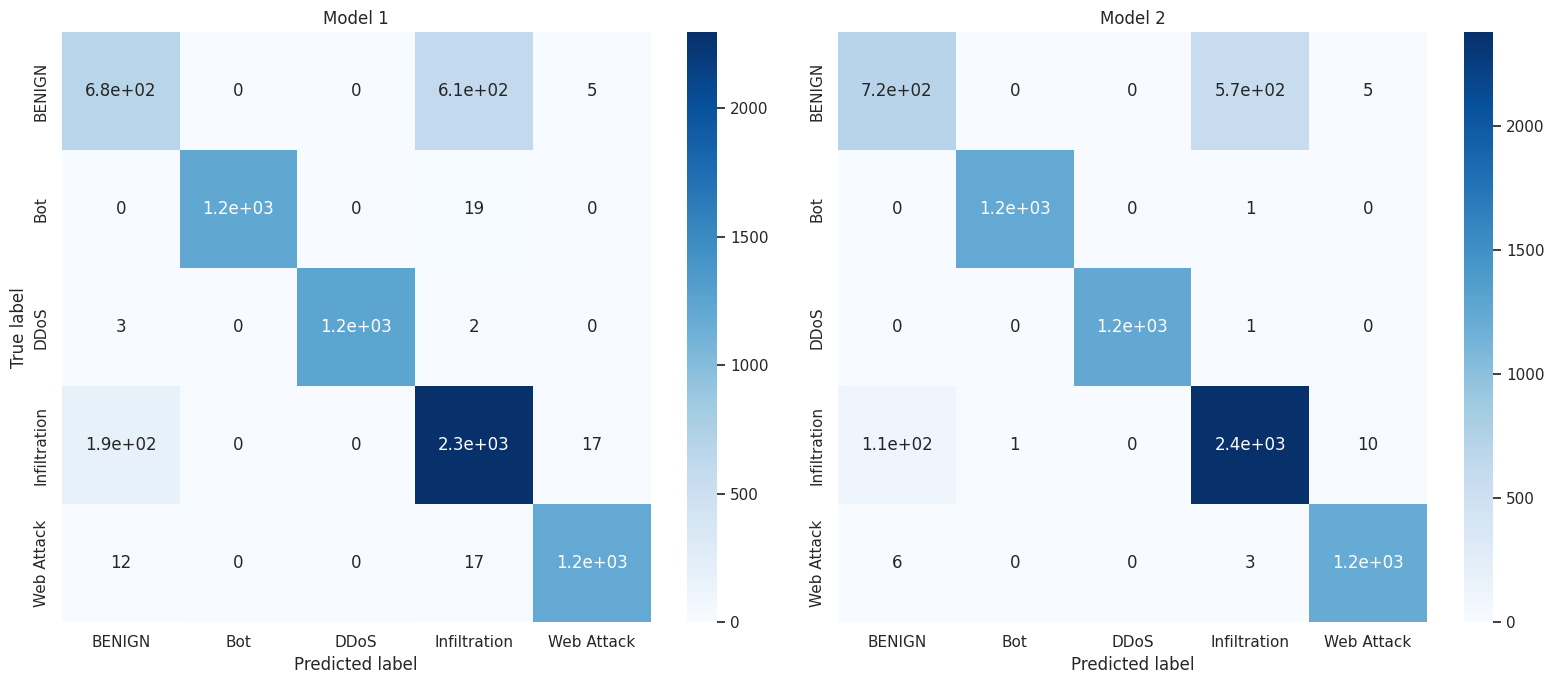

In [ ]:
# Random Forest Models
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

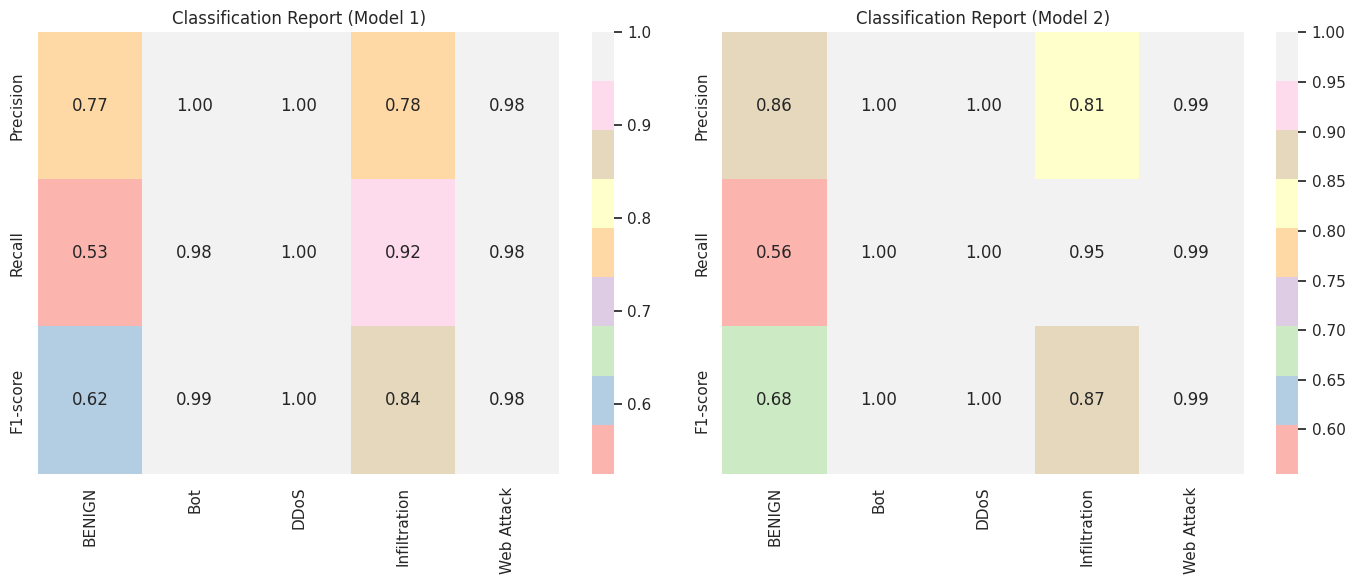

In [ ]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

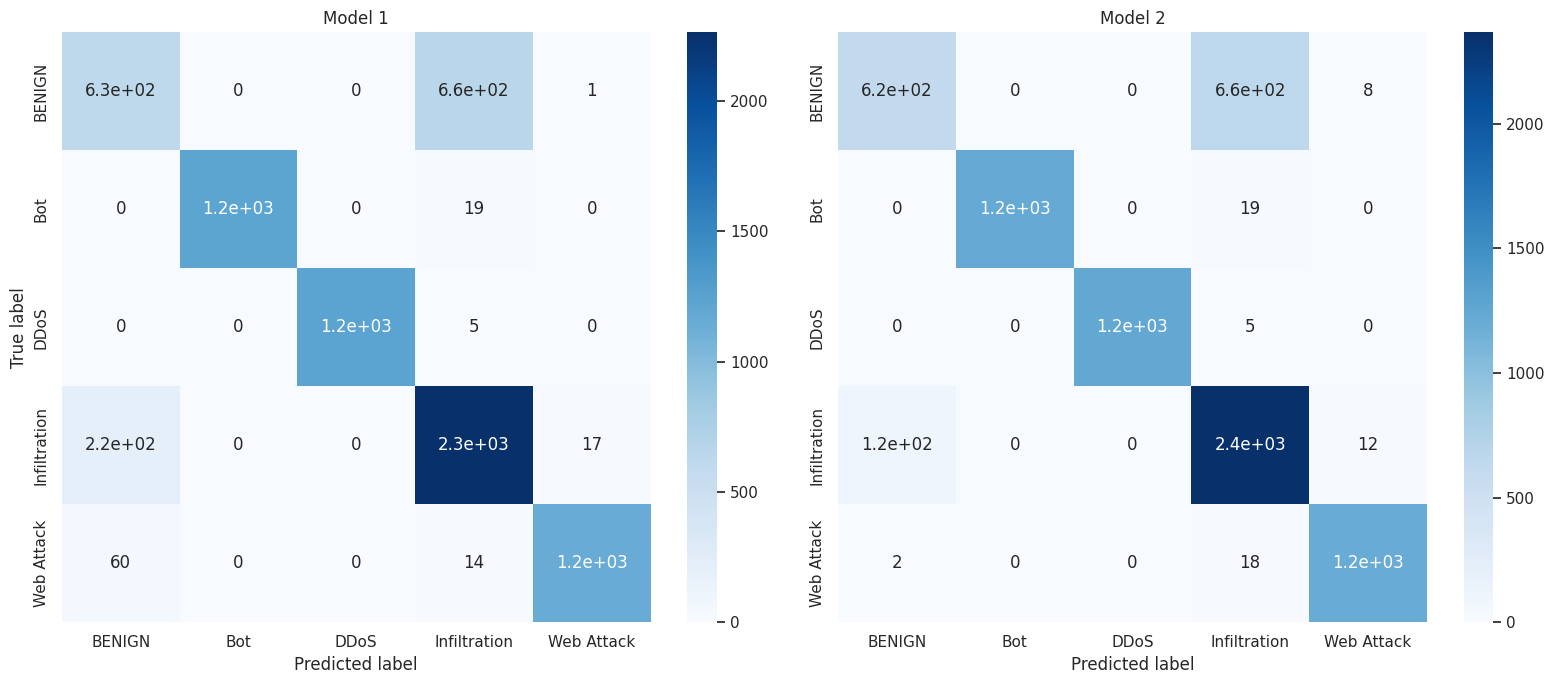

In [ ]:
# Decision Trees
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_dt1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_dt2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt2.classes_, yticklabels = dt2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

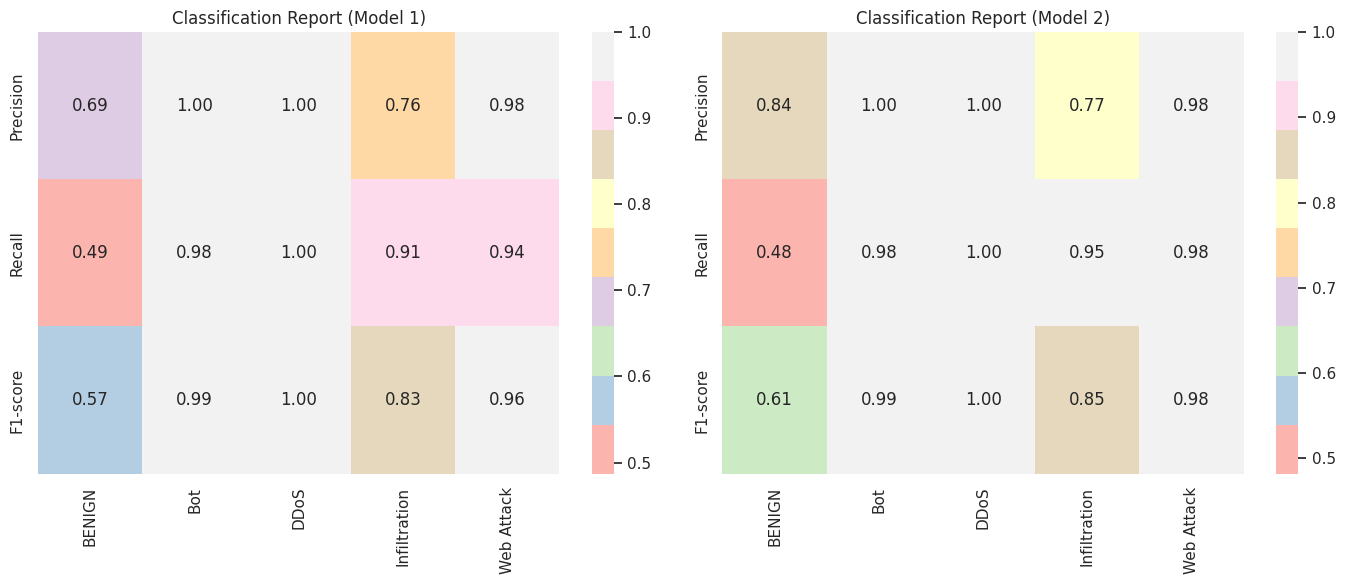

In [ ]:
target_names = dt1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_dt1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_dt2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

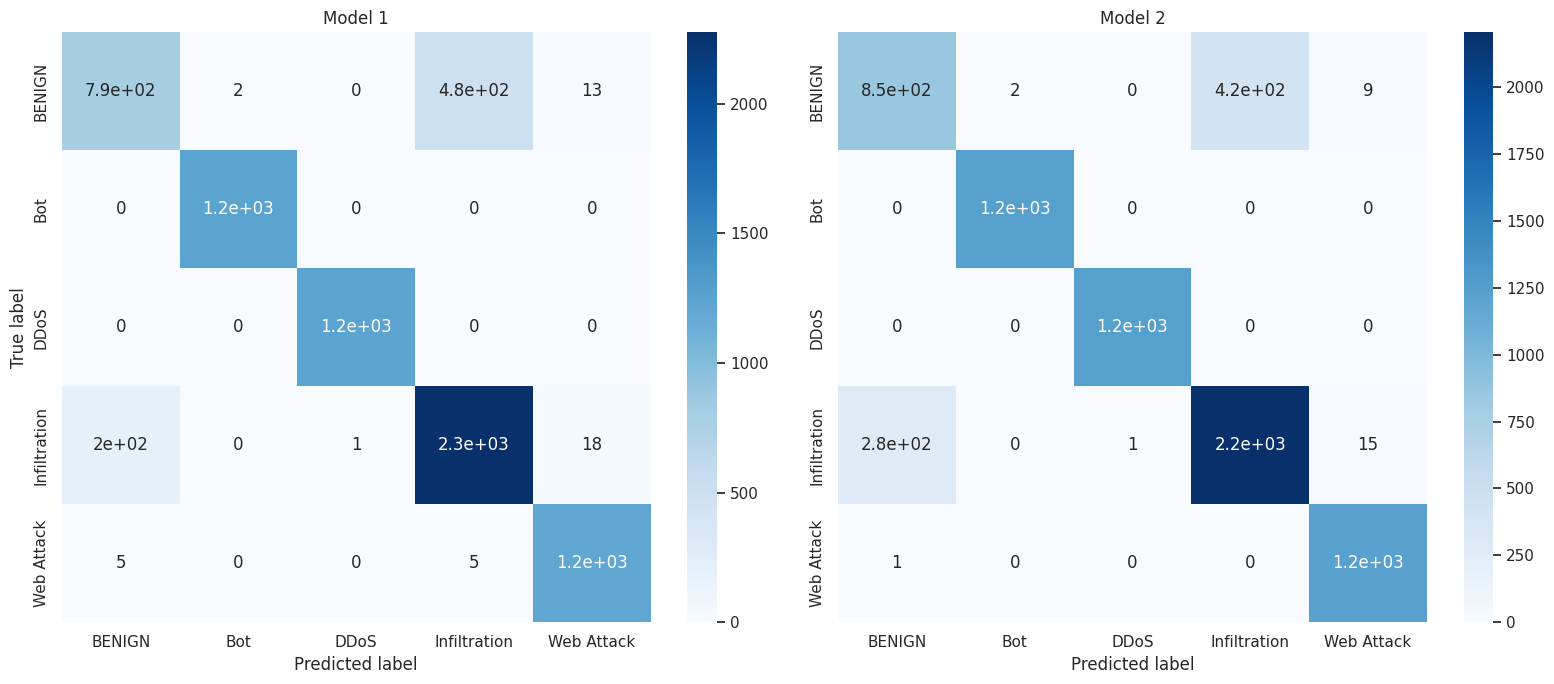

In [ ]:
# KNN
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_knn1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_knn2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = knn1.classes_, yticklabels = knn1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = knn2.classes_, yticklabels = knn2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

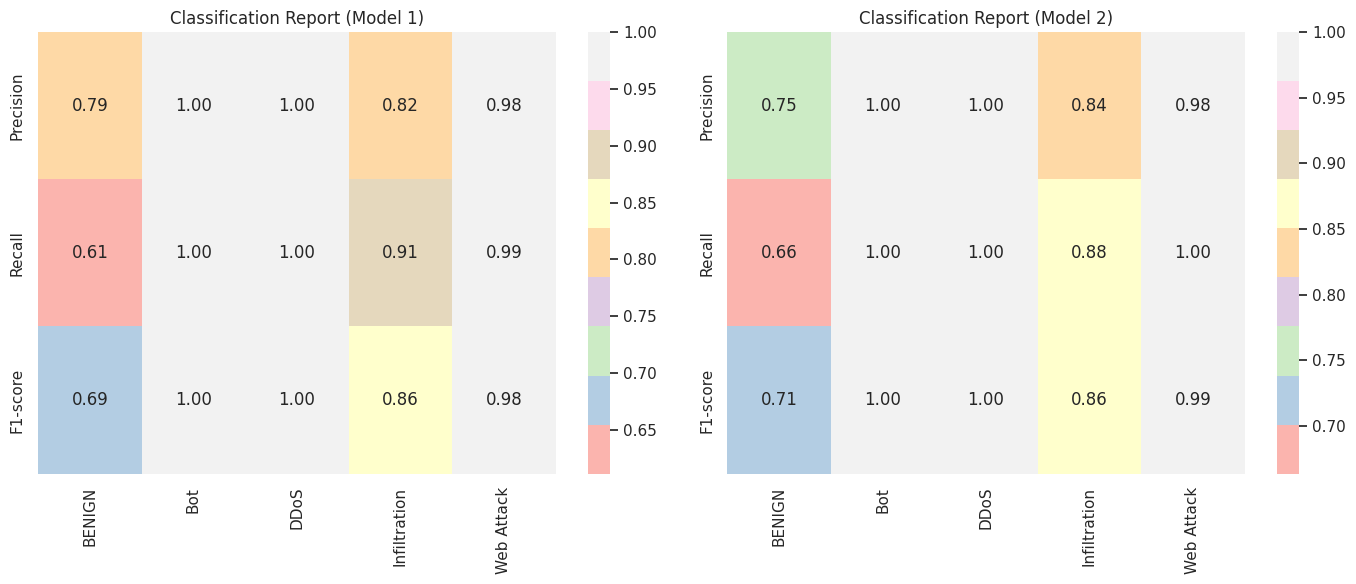

In [ ]:
target_names = knn1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_knn1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_knn2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

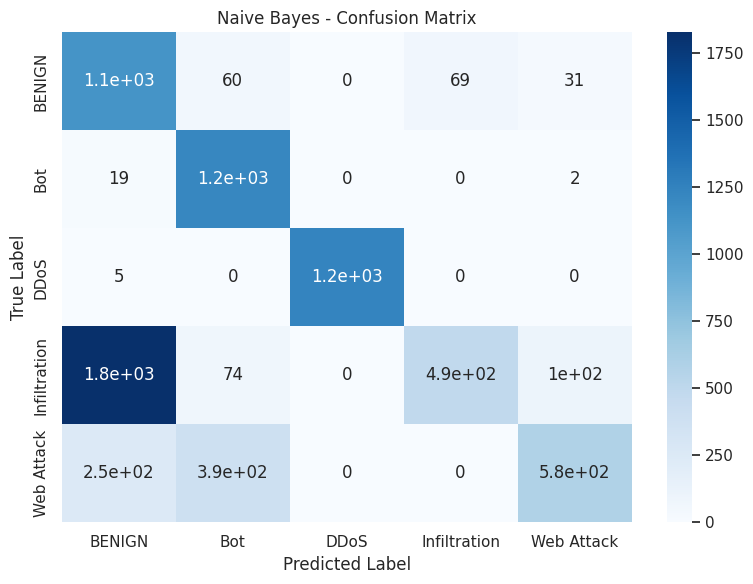

In [ ]:
# Predict using Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Compute confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot single heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)

plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

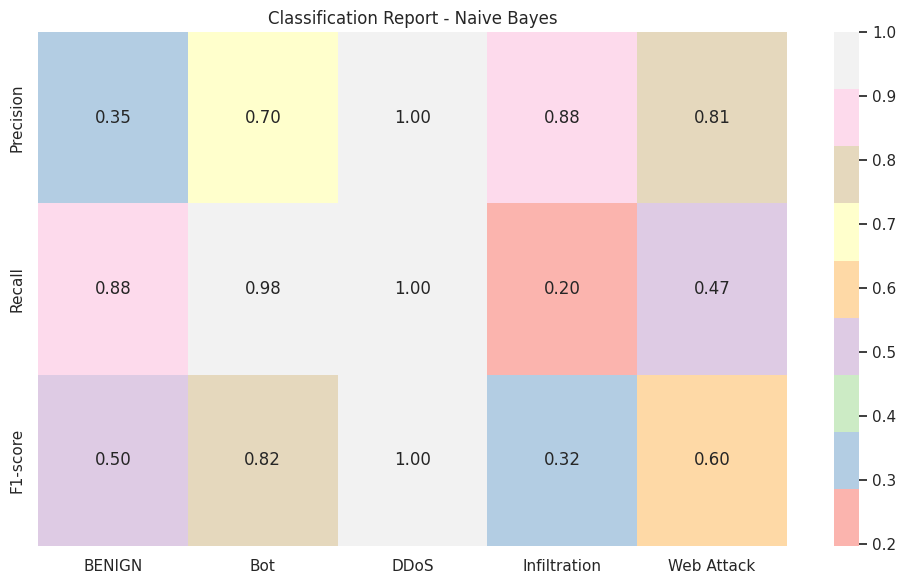

In [ ]:
# Get class labels
target_names = nb_model.classes_

# Compute classification metrics
metrics1 = classification_report(y_true=y_test, y_pred=y_pred_nb, target_names=target_names, output_dict=True)

# Extract precision, recall, f1-score
precision1 = [metrics1[target]['precision'] for target in target_names]
recall1 = [metrics1[target]['recall'] for target in target_names]
f1_score1 = [metrics1[target]['f1-score'] for target in target_names]

# Prepare data for heatmap
data1 = np.array([precision1, recall1, f1_score1])
rows = ['Precision', 'Recall', 'F1-score']

# Plot single heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data1, cmap='Pastel1', annot=True, fmt='.2f',
            xticklabels=target_names, yticklabels=rows)

plt.title('Classification Report - Naive Bayes')
plt.tight_layout()
plt.show()

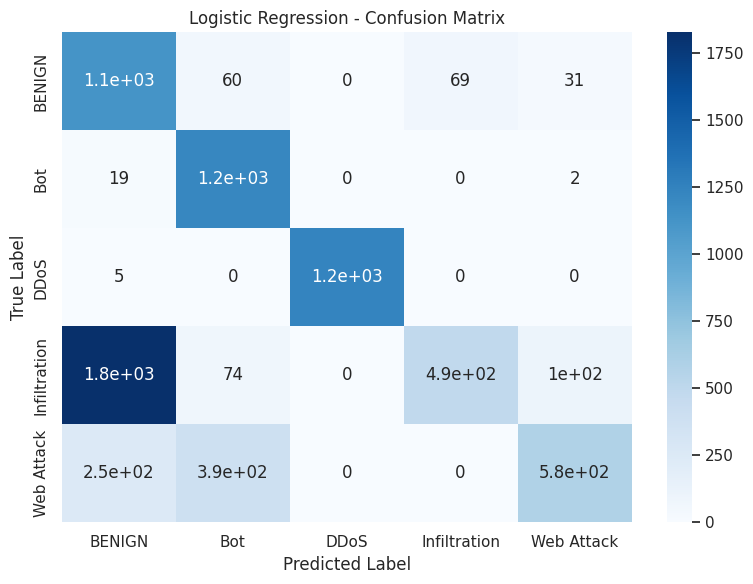

In [ ]:
# Predict using Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_nb)

# Plot single heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues',
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)

plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

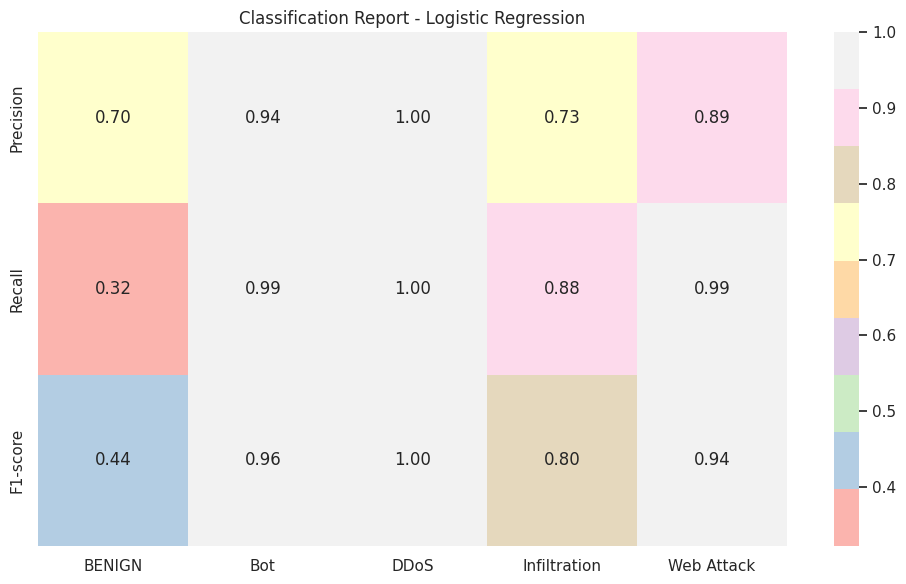

In [ ]:
# Get class labels
target_names = lr_model.classes_

# Compute classification metrics
metrics1 = classification_report(y_true=y_test, y_pred=y_pred_lr, target_names=target_names, output_dict=True)

# Extract precision, recall, f1-score
precision1 = [metrics1[target]['precision'] for target in target_names]
recall1 = [metrics1[target]['recall'] for target in target_names]
f1_score1 = [metrics1[target]['f1-score'] for target in target_names]

# Prepare data for heatmap
data1 = np.array([precision1, recall1, f1_score1])
rows = ['Precision', 'Recall', 'F1-score']

# Plot single heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data1, cmap='Pastel1', annot=True, fmt='.2f',
            xticklabels=target_names, yticklabels=rows)

plt.title('Classification Report - Logistic Regression')
plt.tight_layout()
plt.show()

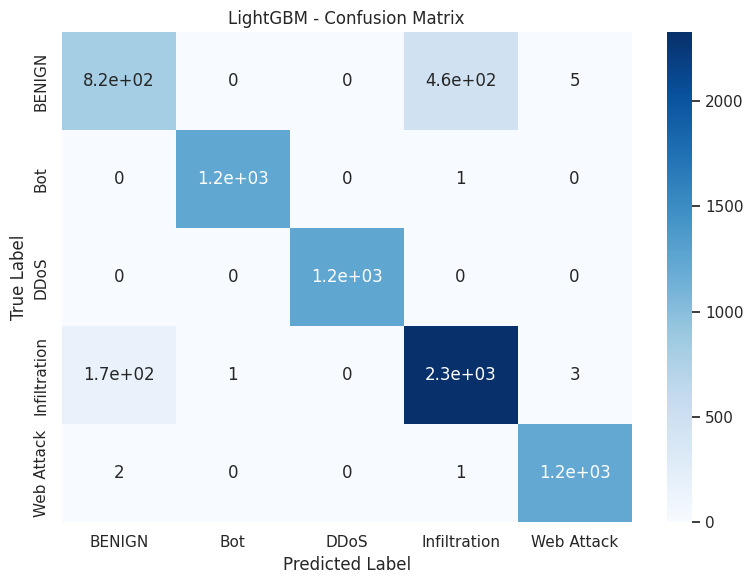

In [ ]:
# Predict using LightGBM
y_pred_lgb = lgb_model.predict(X_test)

# Compute confusion matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plot single heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, cmap='Blues',
            xticklabels=lgb_model.classes_, yticklabels=lgb_model.classes_)

plt.title('LightGBM - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

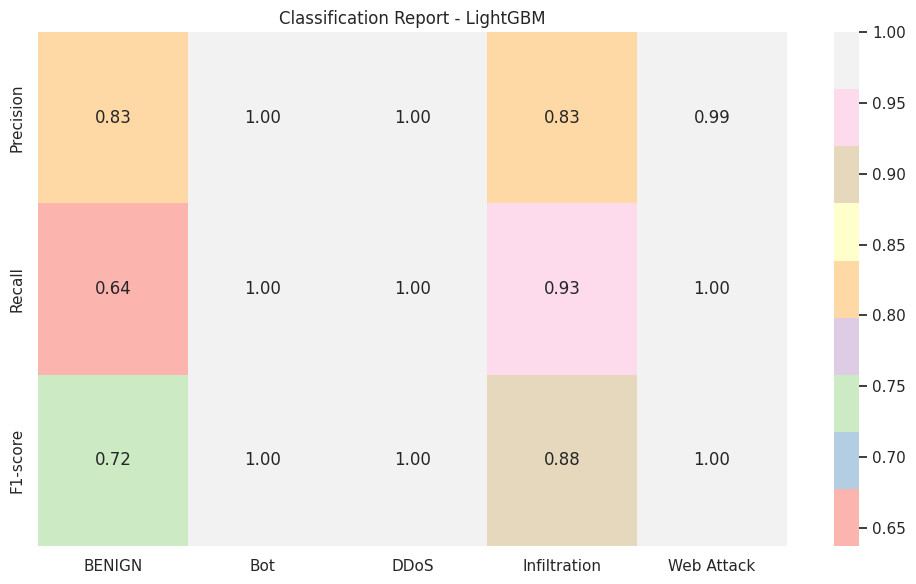

In [ ]:
# Get class labels
target_names = lgb_model.classes_

# Compute classification metrics
metrics1 = classification_report(y_true=y_test, y_pred=y_pred_lgb, target_names=target_names, output_dict=True)

# Extract precision, recall, f1-score
precision1 = [metrics1[target]['precision'] for target in target_names]
recall1 = [metrics1[target]['recall'] for target in target_names]
f1_score1 = [metrics1[target]['f1-score'] for target in target_names]

# Prepare data for heatmap
data1 = np.array([precision1, recall1, f1_score1])
rows = ['Precision', 'Recall', 'F1-score']

# Plot single heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data1, cmap='Pastel1', annot=True, fmt='.2f',
            xticklabels=target_names, yticklabels=rows)

plt.title('Classification Report - LightGBM')
plt.tight_layout()
plt.show()

comparision of multi-class algorithms

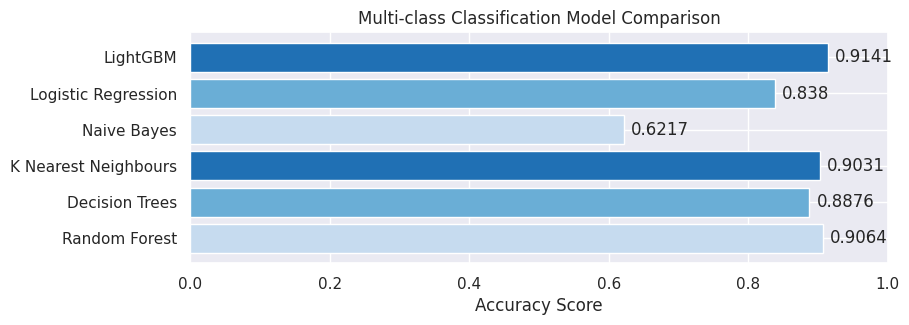

In [ ]:
palette = sns.color_palette('Blues', n_colors = 3)

rf_acc = accuracy_score(y_pred_rf2, y_test)
dt_acc = accuracy_score(y_pred_dt2, y_test)
knn_acc = accuracy_score(y_pred_knn2, y_test)
nb_acc = accuracy_score(y_pred_nb, y_test)
lr_acc = accuracy_score(y_pred_lr, y_test)
lgb_acc = accuracy_score(y_pred_lgb, y_test)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours', 'Naive Bayes', 'Logistic Regression', 'LightGBM']
scores = [rf_acc, dt_acc, knn_acc, nb_acc, lr_acc, lgb_acc]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

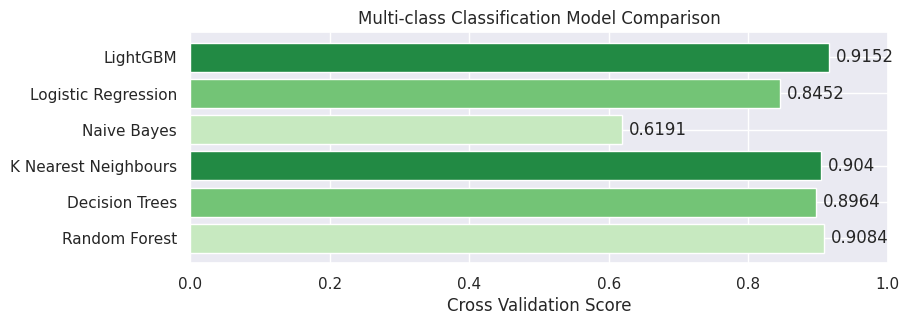

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours', 'Naive Bayes', 'Logistic Regression', 'LightGBM']
scores = [cv_rf2.mean(), cv_dt2.mean(), cv_knn2.mean(), cv_nb_model.mean(), cv_lr_model.mean(), cv_lgb_model.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

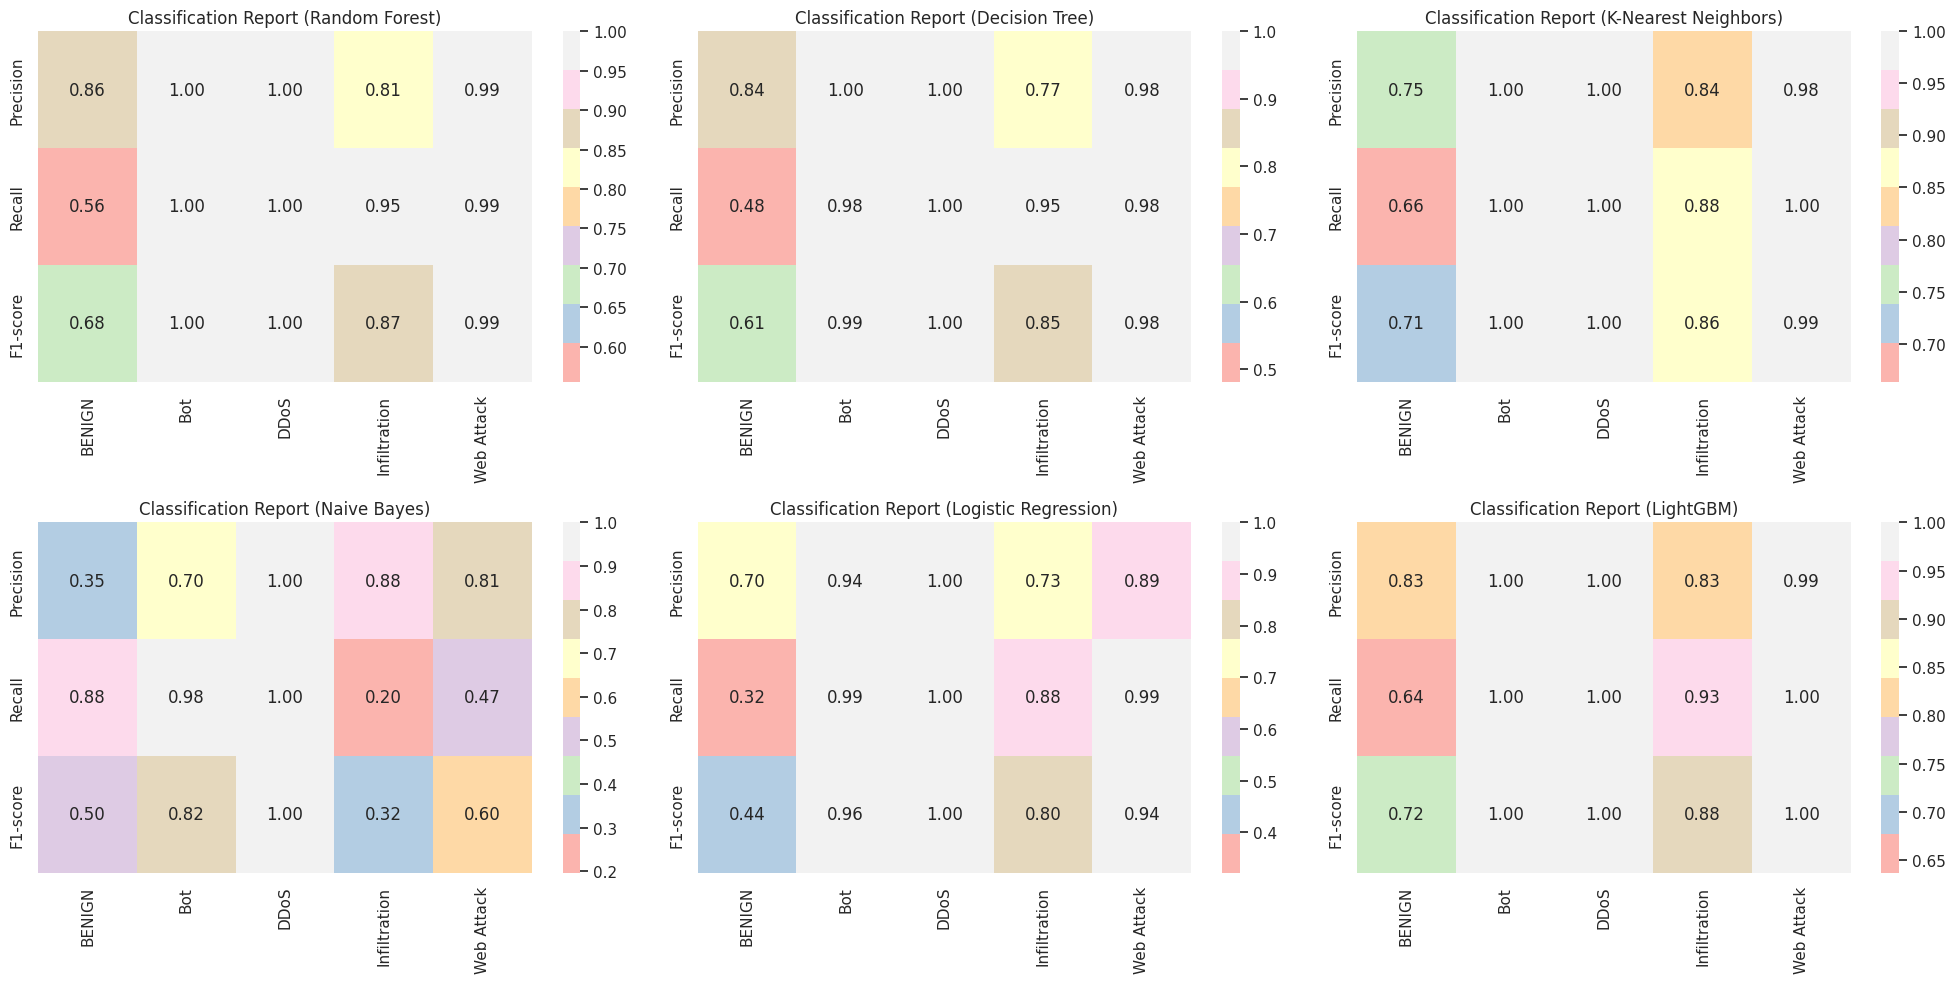

In [ ]:
# List of predictions from different models
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2, y_pred_nb, y_pred_lr, y_pred_lgb]
model_names = [
    'Random Forest', 'Decision Tree', 'K-Nearest Neighbors',
    'Naive Bayes', 'Logistic Regression', 'LightGBM'
]

# Target class names
target_names = rf2.classes_  # or use your actual label encoder classes

# Collect metrics for each model
datas = []
for pred in preds:
    metrics = classification_report(
        y_true=y_test, y_pred=pred, target_names=target_names, output_dict=True
    )
    precision = [metrics[cls]['precision'] for cls in target_names]
    recall = [metrics[cls]['recall'] for cls in target_names]
    f1_score = [metrics[cls]['f1-score'] for cls in target_names]
    datas.append(np.array([precision, recall, f1_score]))

# Plot heatmaps in a 2x3 grid
rows = ['Precision', 'Recall', 'F1-score']
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    sns.heatmap(
        datas[i], cmap='Pastel1', annot=True, fmt='.2f',
        xticklabels=target_names, yticklabels=rows, ax=ax
    )
    ax.set_title(f'Classification Report ({model_names[i]})')

plt.tight_layout()
plt.show()

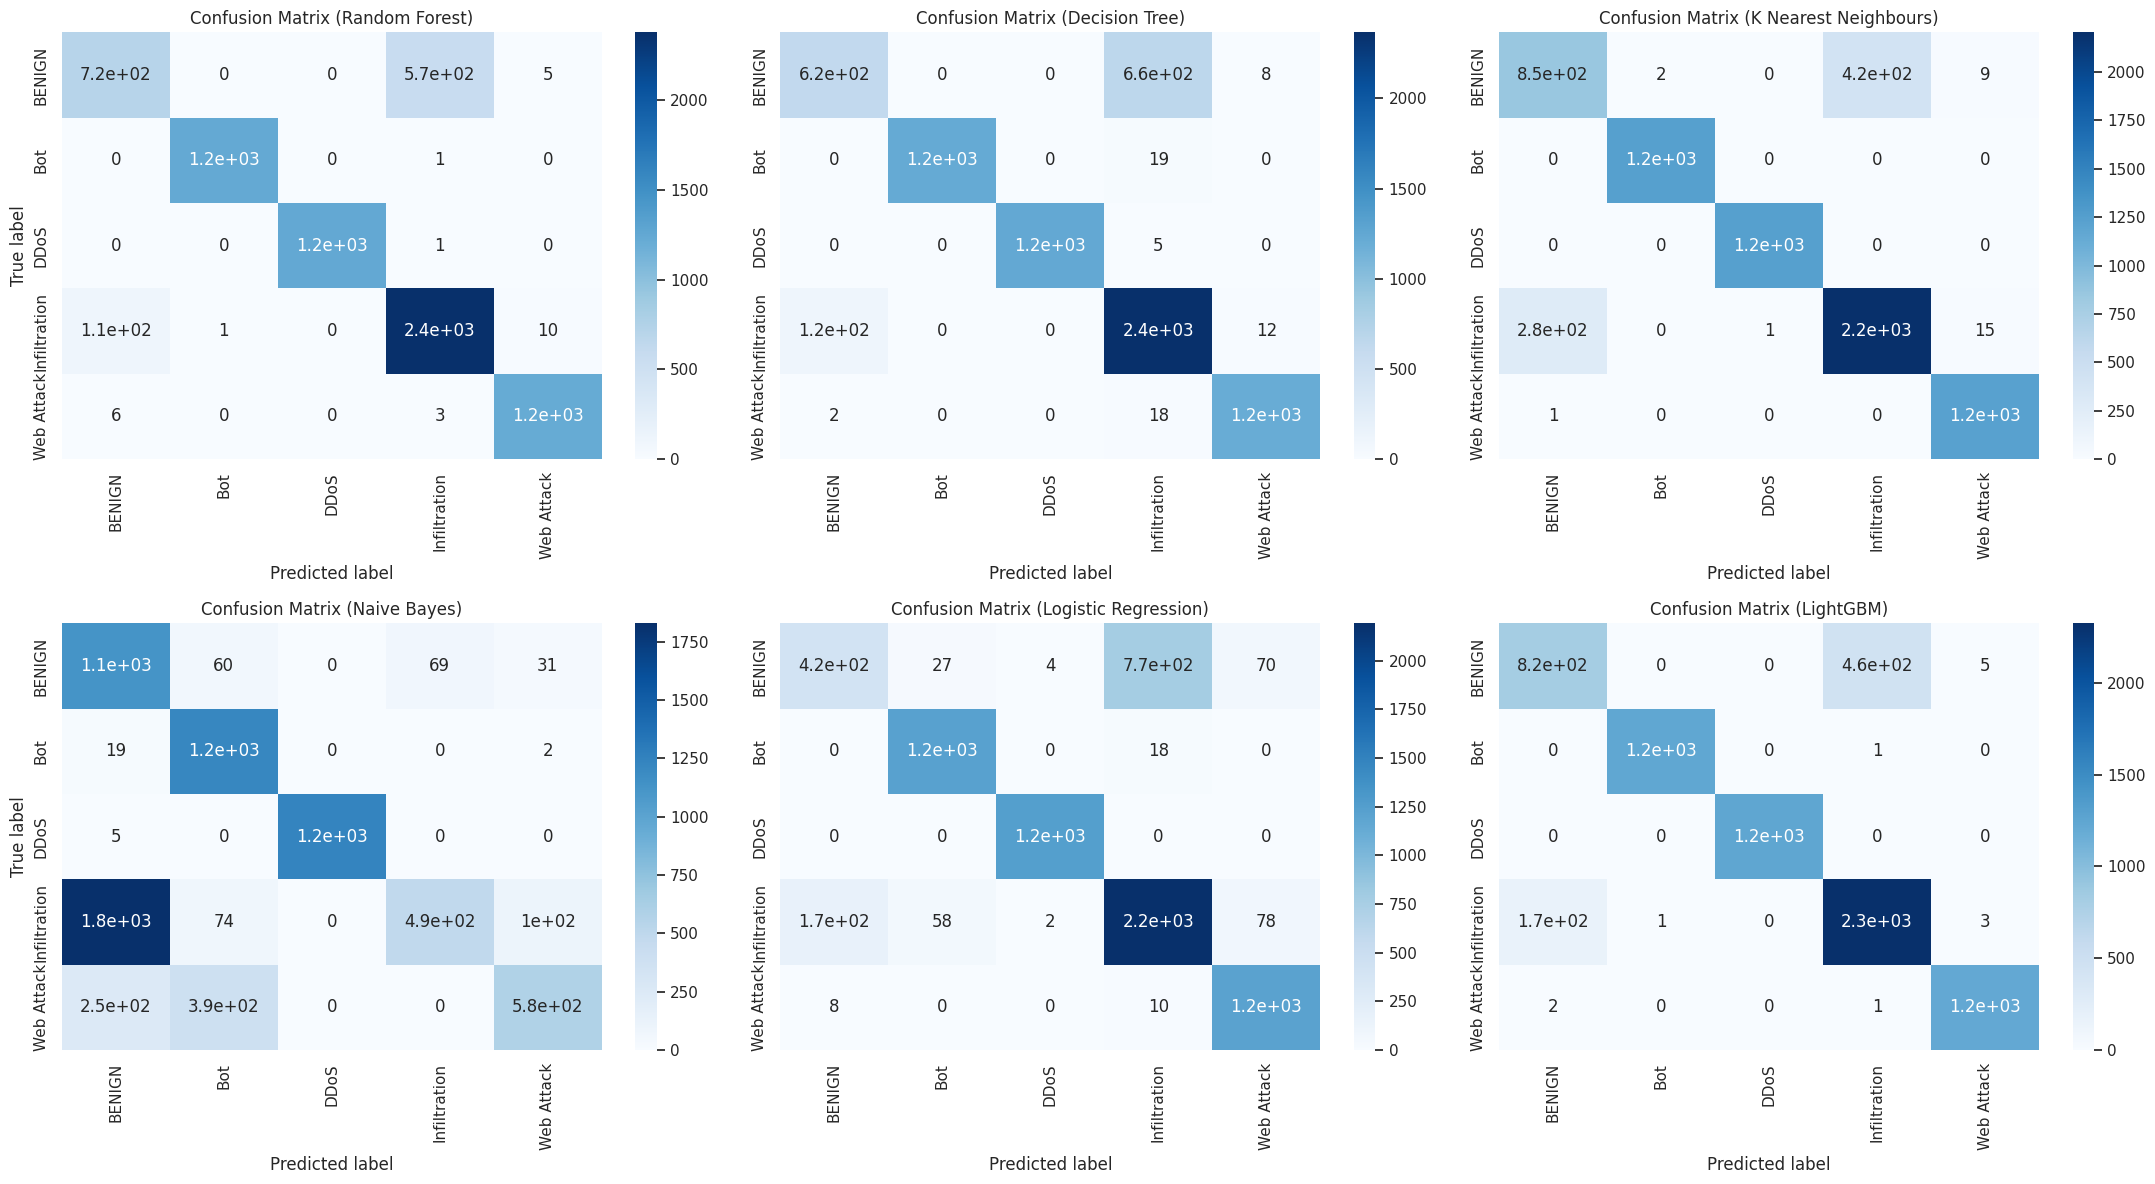

In [ ]:
# List of predictions from 6 models
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2, y_pred_nb, y_pred_lr, y_pred_lgb]
model_names = [
    'Random Forest', 'Decision Tree', 'K Nearest Neighbours',
    'Naive Bayes', 'Logistic Regression', 'LightGBM'
]

# Compute confusion matrices
conf_matrices = [confusion_matrix(y_test, y_pred) for y_pred in preds]

# Class labels (assuming all models use same labels as rf2)
class_labels = rf2.classes_  # or nb_model.classes_

# Plot 2x3 grid of confusion matrices
fig, axs = plt.subplots(2, 3, figsize=(22, 12))

for i, ax in enumerate(axs.flat):
    sns.heatmap(conf_matrices[i], annot=True, cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title(f'Confusion Matrix ({model_names[i]})')
    ax.set_xlabel('Predicted label')
    if i % 3 == 0:
        ax.set_ylabel('True label')

plt.tight_layout()
plt.show()

# Save The Models


In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf2, '/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/random_forest_model_2018.joblib')
joblib.dump(dt2, '/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/decision_tree_model_2018.joblib')
joblib.dump(knn2, '/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/knn_model_2018.joblib')
joblib.dump(nb_model, '/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/nb_model_2018.joblib')
joblib.dump(lr_model, '/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/lr_model_2018.joblib')
joblib.dump(lgb_model, '/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/lgb_model_2018.joblib')

['/content/drive/MyDrive/Capstone /CICIDS2018_kaggle/lgb_model_2018.joblib']